<a href="https://colab.research.google.com/github/hyungchanchoi/AlgorithmTrading_pykiwoom/blob/main/analysis/kodex_tiger_active_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd drive/My Drive/algorithmtrading/pair_trading

[Errno 2] No such file or directory: 'drive/My Drive/algorithmtrading/pair_trading'
/content/drive/My Drive/algorithmtrading/pair_trading


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

# - 과거 1분단위 데이터 받아오기

In [ ]:
now = '_1229'

kodex200 = pd.read_pickle('kodex200'+now)
kodex_inv = pd.read_pickle('kodex_inv'+now)
# kodex_x2 = pd.read_pickle('kodex_x2'+now)
# kodex_inv = pd.read_pickle('kodex_inversex2'+now)
kodex_active = pd.read_pickle('kodex_active'+now)
tiger_active = pd.read_pickle('tiger_active'+now)
temp =  pd.merge(left = kodex200 , right = kodex_inv, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = kodex_active, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = tiger_active, how = "inner", on = "time")
temp.columns = ['kodex200','kodex_inv','kodex_active','tiger_active']

temp['kodex200_cumret'] = np.log(temp['kodex200']/temp['kodex200'][0])
temp['kodex_inv_cumret'] = np.log(temp['kodex_inv']/temp['kodex_inv'][0])

temp['kodex_active_cumret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])
temp['cumret_spread_kodex'] = temp['kodex_active_cumret'] - temp['kodex200_cumret']
temp['ma5_kodex'] = temp['cumret_spread_kodex'].rolling(window=5, center=False).mean()
temp['ma10_kodex'] = temp['cumret_spread_kodex'].rolling(window=2, center=False).mean()
temp['ma20_kodex'] = temp['cumret_spread_kodex'].rolling(window=3, center=False).mean()
temp['ma30_kodex'] = temp['cumret_spread_kodex'].rolling(window=4, center=False).mean()

temp['tiger_active_cumret'] = np.log(temp['tiger_active']/temp['tiger_active'][0])
temp['cumret_spread_tiger'] = temp['tiger_active_cumret'] - temp['kodex200_cumret']
temp['ma5_tiger'] = temp['cumret_spread_tiger'].rolling(window=1, center=False).mean()
temp['ma10_tiger'] = temp['cumret_spread_tiger'].rolling(window=2, center=False).mean()
temp['ma20_tiger'] = temp['cumret_spread_tiger'].rolling(window=3, center=False).mean()
temp['ma30_tiger'] = temp['cumret_spread_tiger'].rolling(window=4, center=False).mean()
temp

,kodex200,kodex_inv,kodex_active,tiger_active,kodex200_cumret,kodex_inv_cumret,kodex_active_cumret,cumret_spread_kodex,ma5_kodex,ma10_kodex,ma20_kodex,ma30_kodex,tiger_active_cumret,cumret_spread_tiger,ma5_tiger,ma10_tiger,ma20_tiger,ma30_tiger
time,,,,,,,,,,,,,,,,,,
20200929.901,31030,5485,10040.000000,10100,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,nan,nan,nan
20200929.902,31010,5485,10020.000000,10100,-0.000645,0.000000,-0.001994,-0.001349,nan,-0.000675,nan,nan,0.000000,0.000645,0.000645,0.000322,nan,nan
20200929.903,31035,5480,10015.000000,10100,0.000161,-0.000912,-0.002493,-0.002654,nan,-0.002002,-0.001335,nan,0.000000,-0.000161,-0.000161,0.000242,0.000161,nan
20200929.904,31015,5480,10005.000000,10100,-0.000484,-0.000912,-0.003492,-0.003009,nan,-0.002831,-0.002337,-0.001753,0.000000,0.000484,0.000484,0.000161,0.000322,0.000242
20200929.905,31010,5480,10000.000000,10100,-0.000645,-0.000912,-0.003992,-0.003347,-0.002072,-0.003178,-0.003003,-0.002590,0.000000,0.000645,0.000645,0.000564,0.000322,0.000403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201229.1506,38545,4375,12260.000000,12230,0.216872,-0.226111,0.199765,-0.017107,-0.018372,-0.017506,-0.017776,-0.018041,0.191357,-0.025515,-0.025515,-0.025710,-0.024823,-0.024509
20201229.1509,38560,4370,12270.000000,12230,0.217261,-0.227254,0.200580,-0.016681,-0.017769,-0.016894,-0.017231,-0.017502,0.191357,-0.025904,-0.025904,-0.025710,-0.025775,-0.025093
20201229.1510,38545,4375,12270.000000,12225,0.216872,-0.226111,0.200580,-0.016292,-0.017260,-0.016486,-0.016693,-0.016996,0.190948,-0.025924,-0.025924,-0.025914,-0.025781,-0.025812


# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20200929,20201229):
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:
        temps['kodex200_dayret'] = np.log(temps['kodex200']/temps['kodex200'][0])
        temps['kodex_inv_dayret'] = np.log(temps['kodex_inv']/temps['kodex_inv'][0])
        temps['kodex_active_dayret'] = np.log(temps['kodex_active']/temps['kodex_active'][0])
        temps['dayret_spread_kodex'] = temps['kodex_active_dayret'] - temps['kodex_inv_dayret']
        temps['tiger_active_dayret'] = np.log(temps['tiger_active']/temps['tiger_active'][0])
        temps['dayret_spread_tiger'] = temps['tiger_active_dayret'] - temps['kodex_inv_dayret']  
        
        df[str(date)] = temps
        calender.append(str(date))
    except:
        pass

# 그래프 그리기

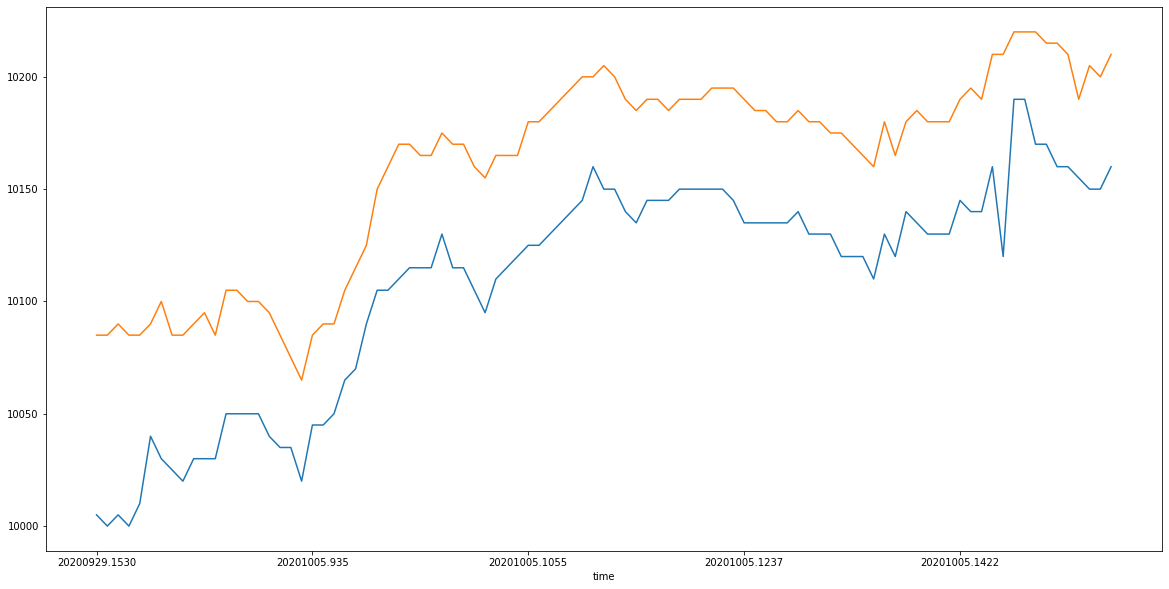

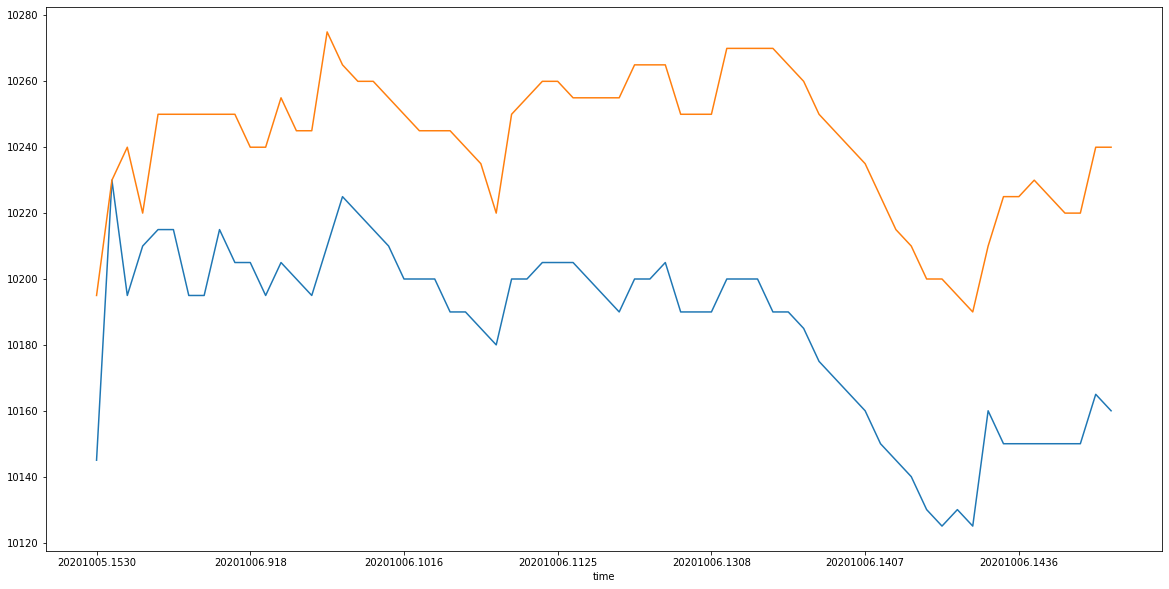

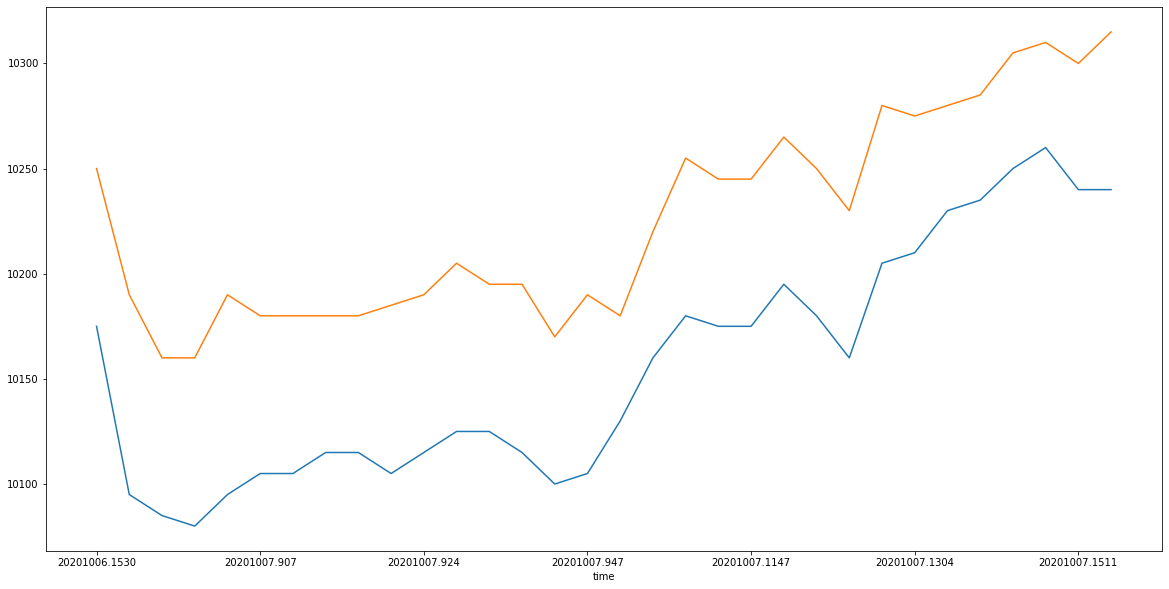

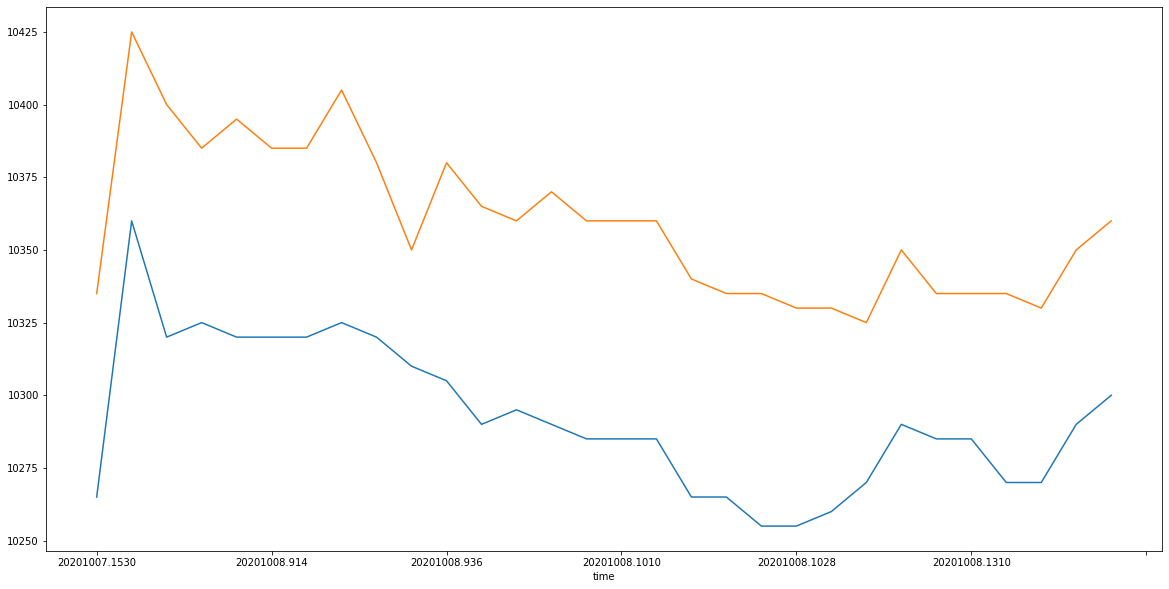

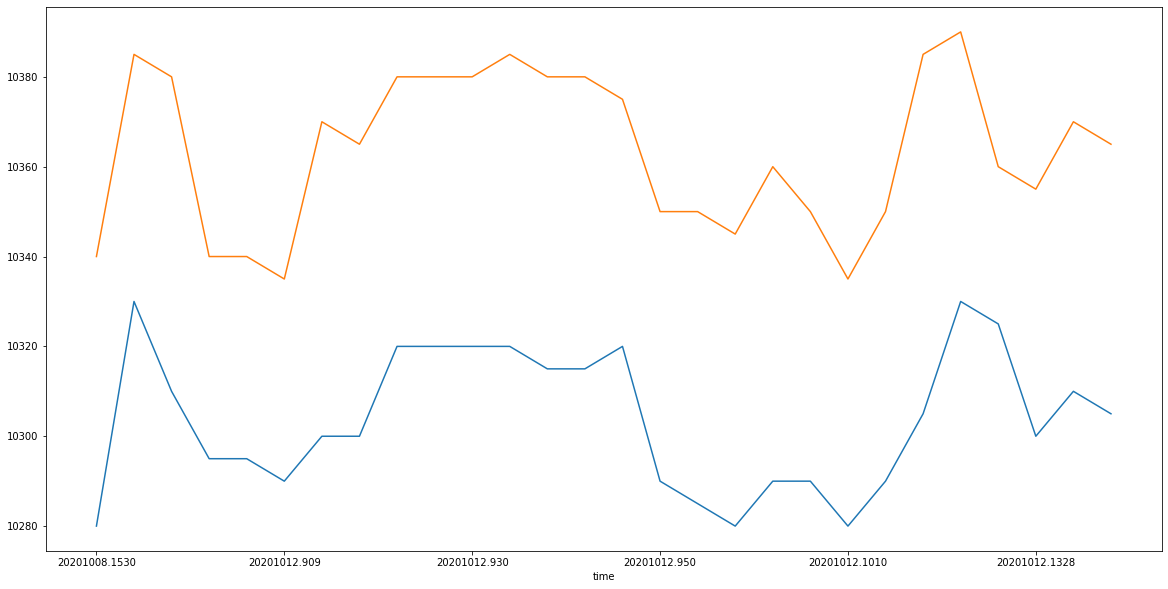

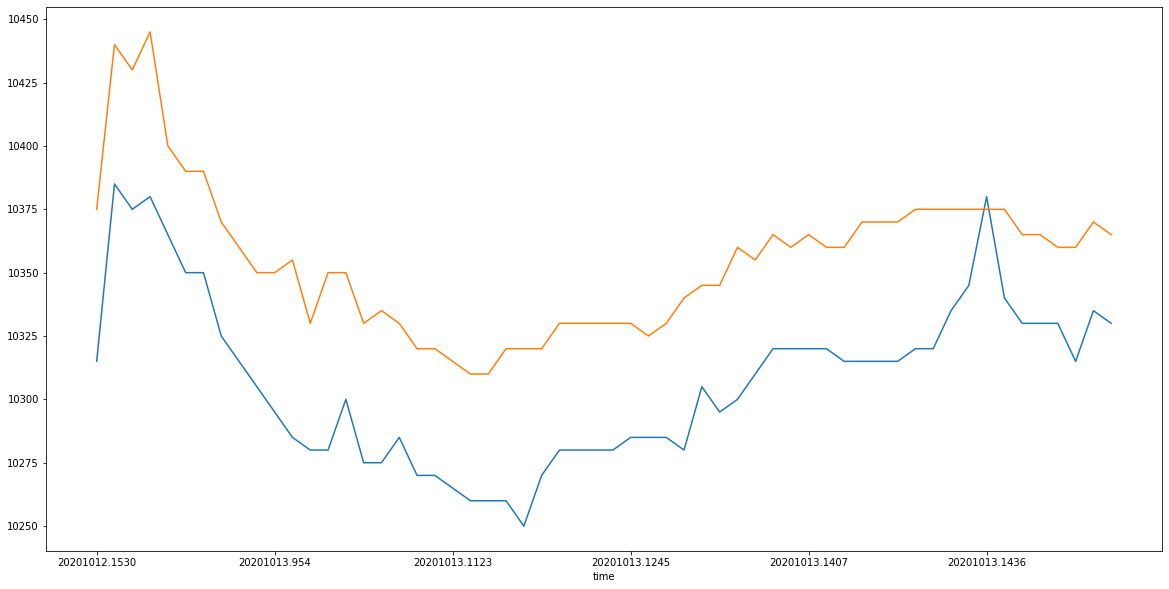

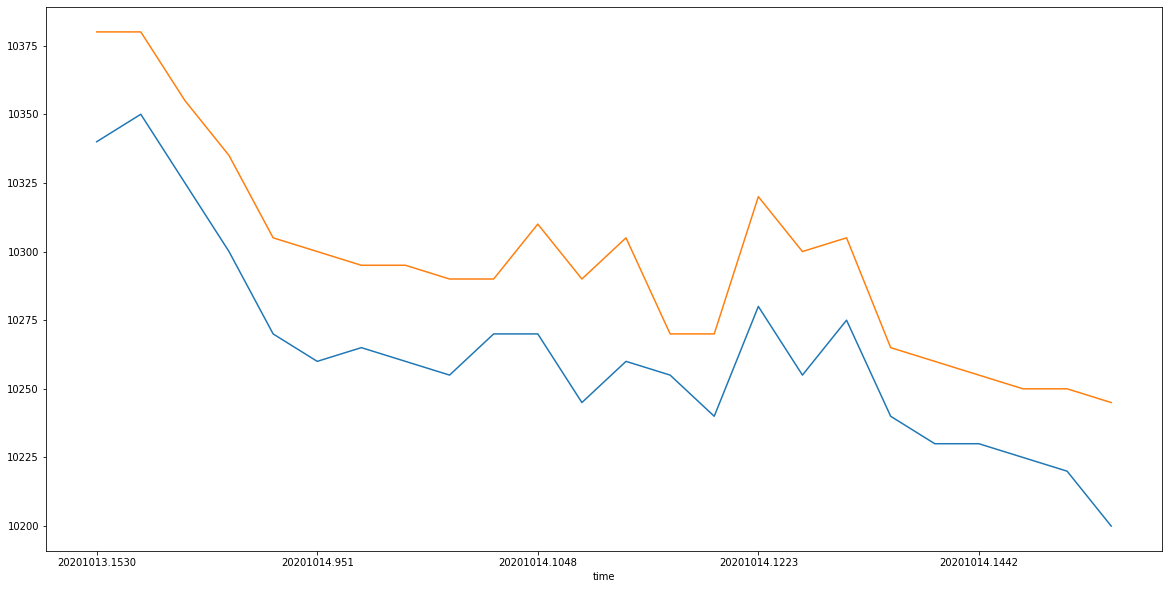

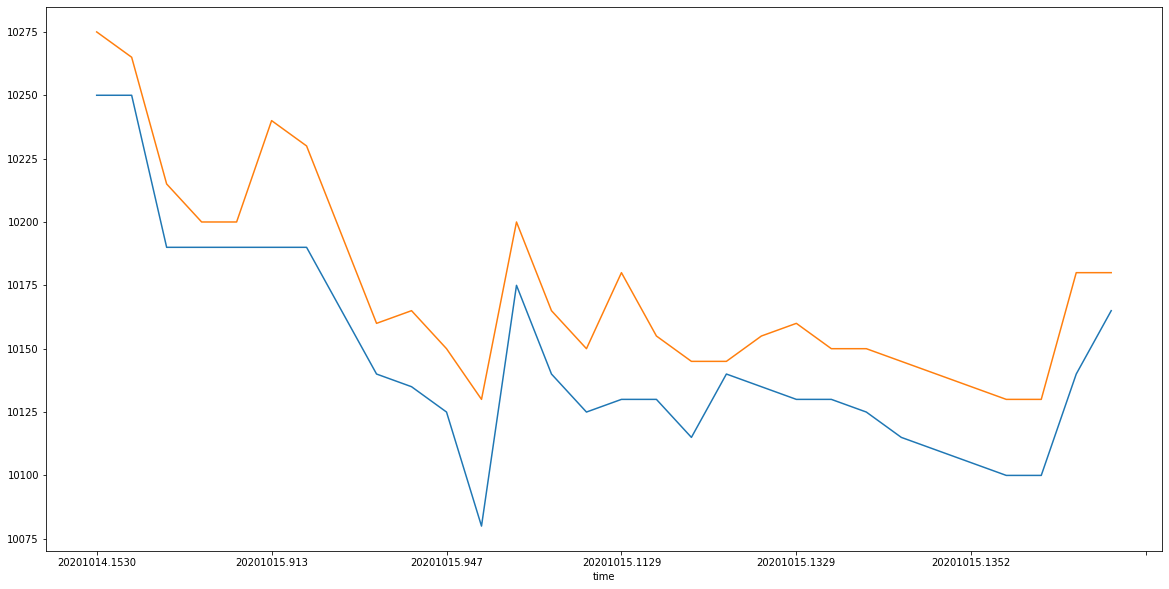

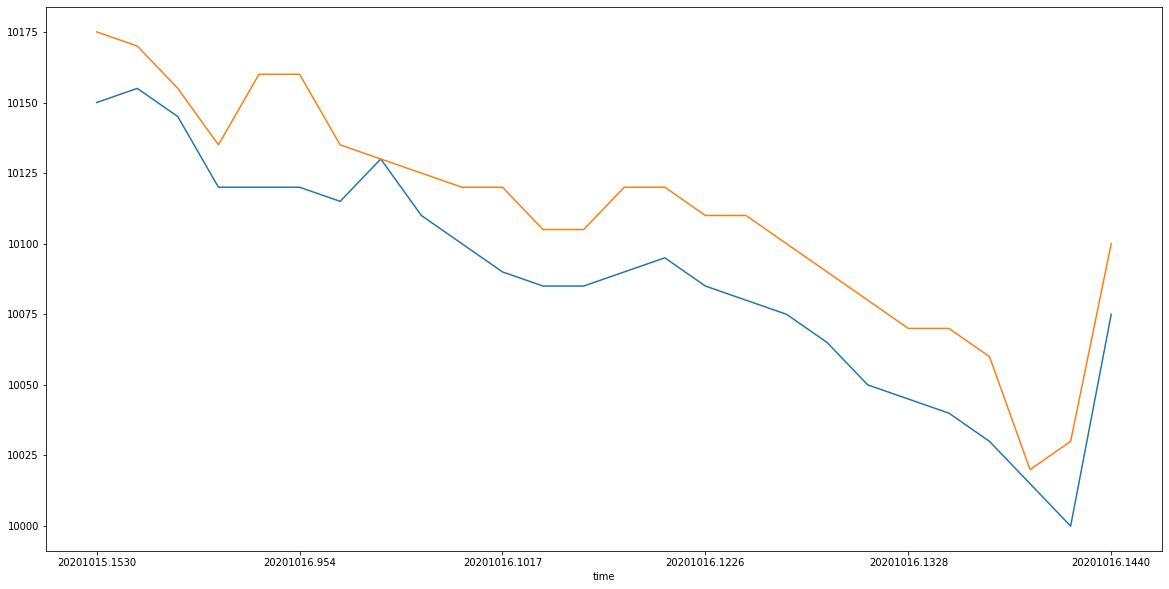

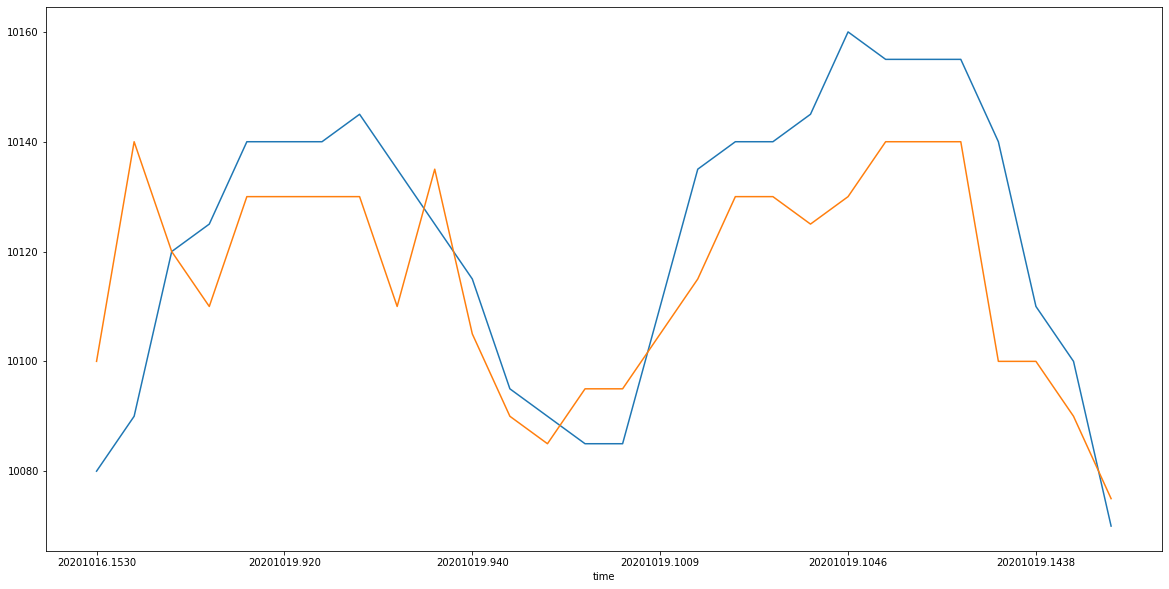

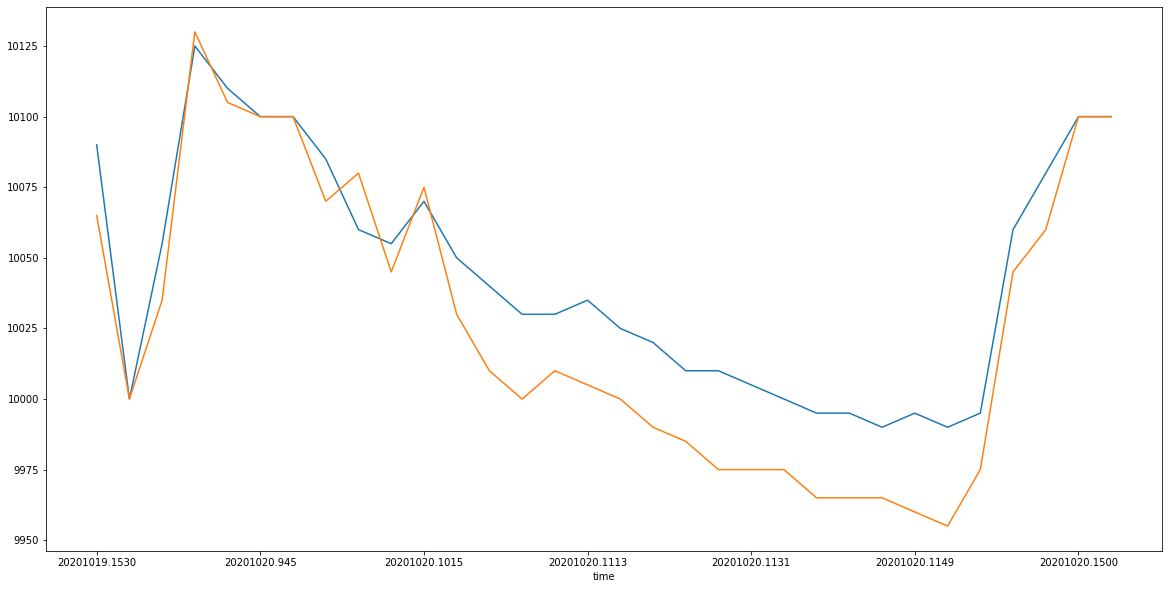

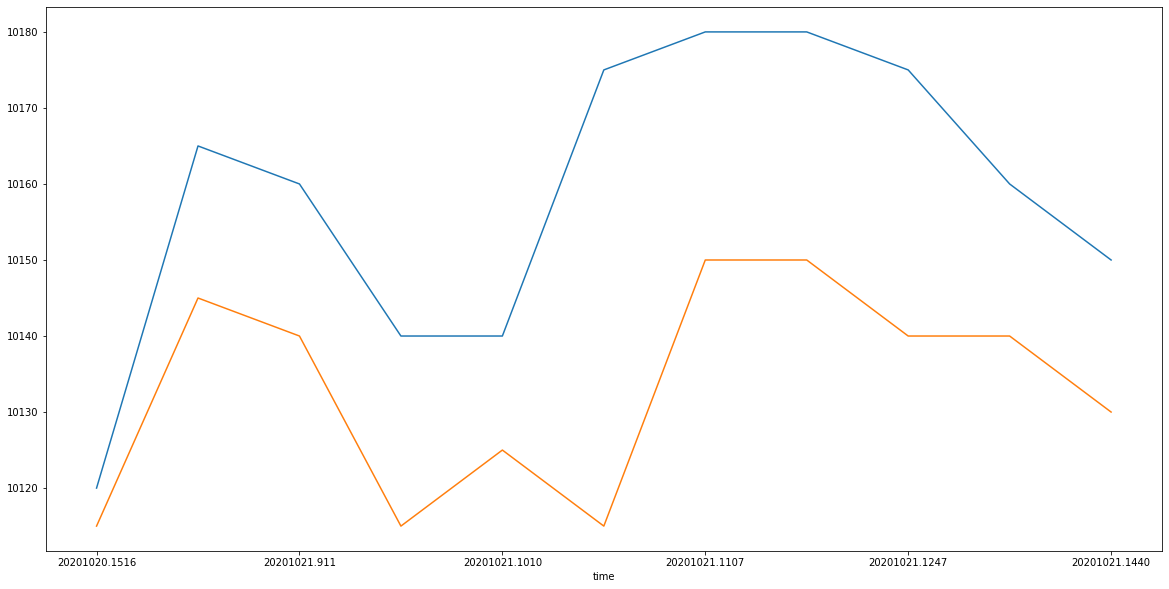

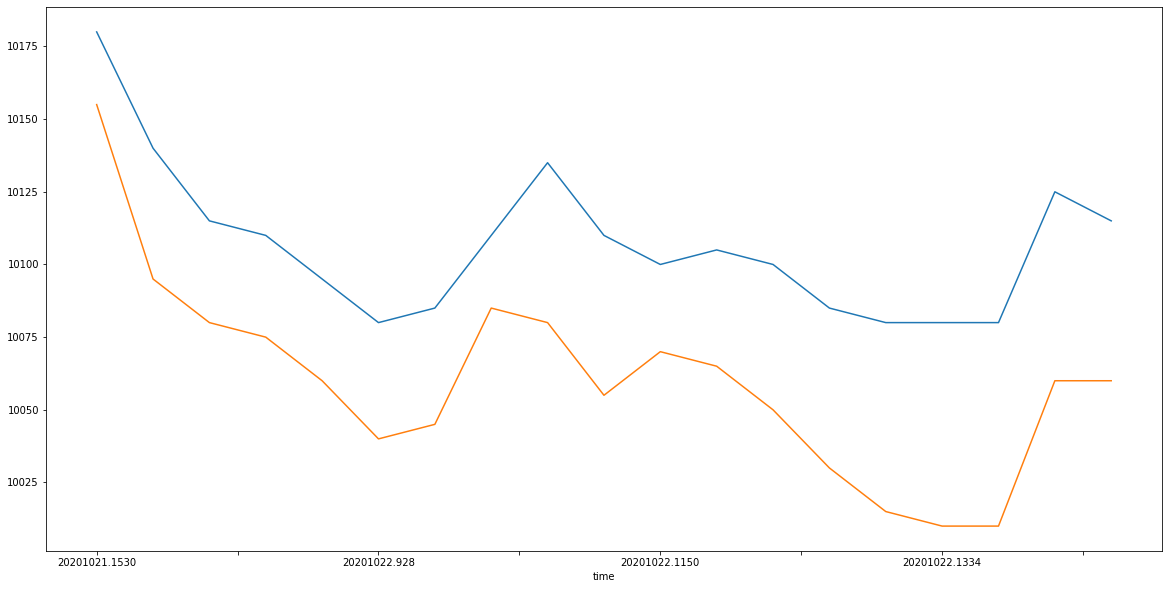

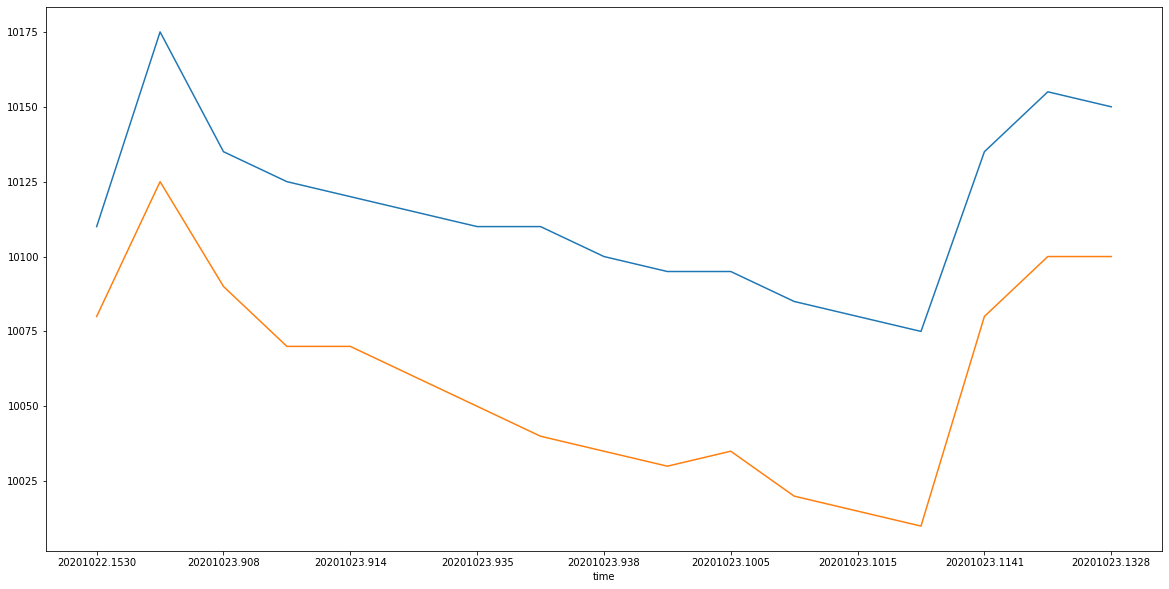

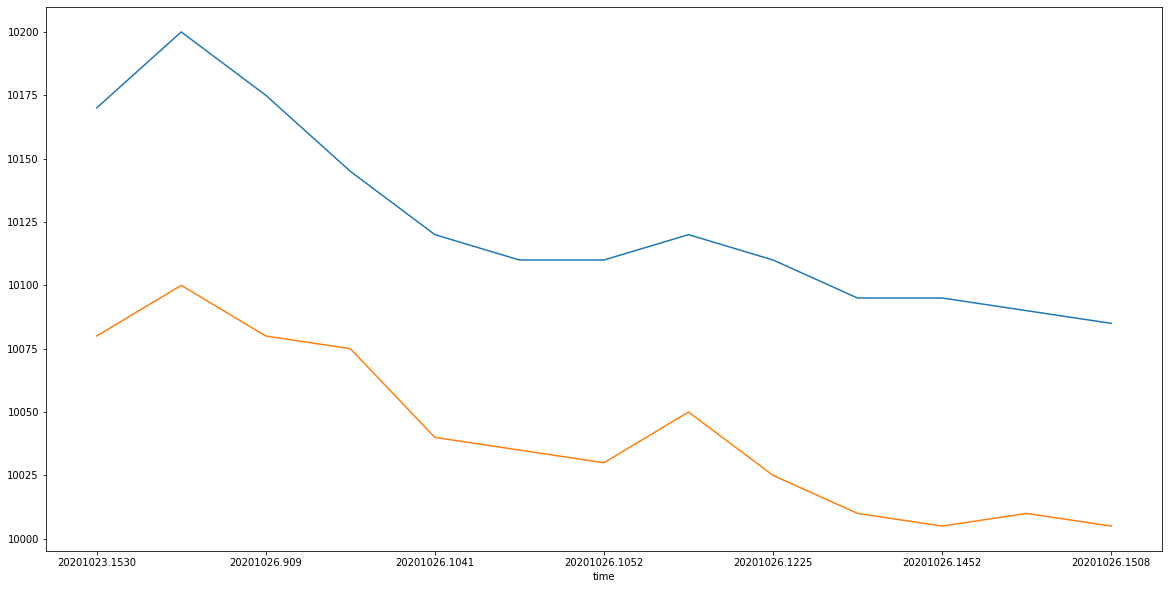

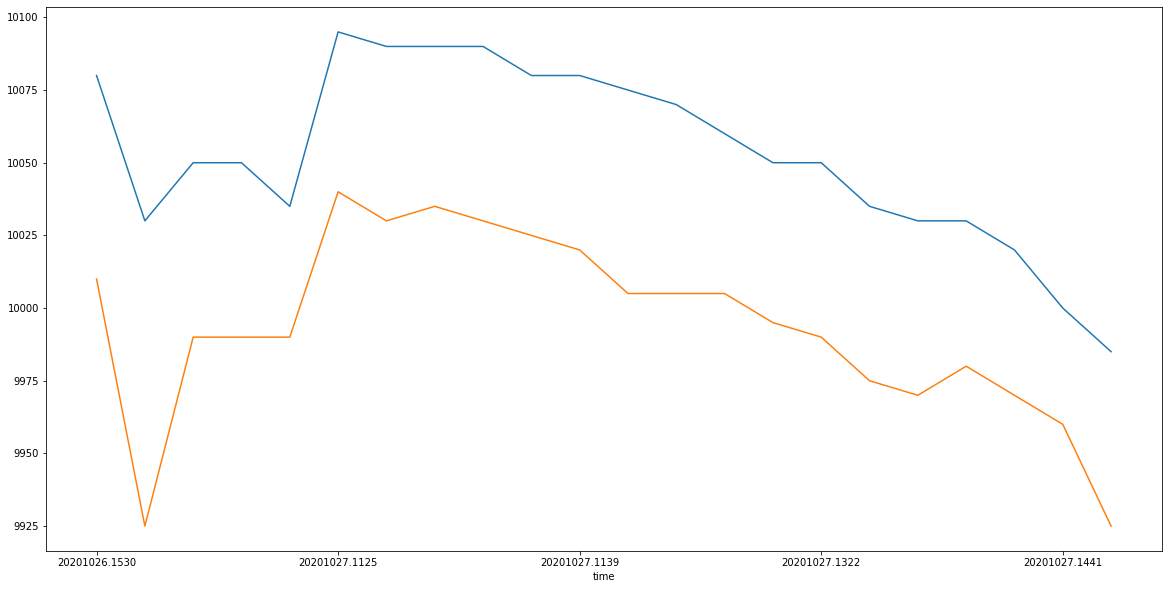

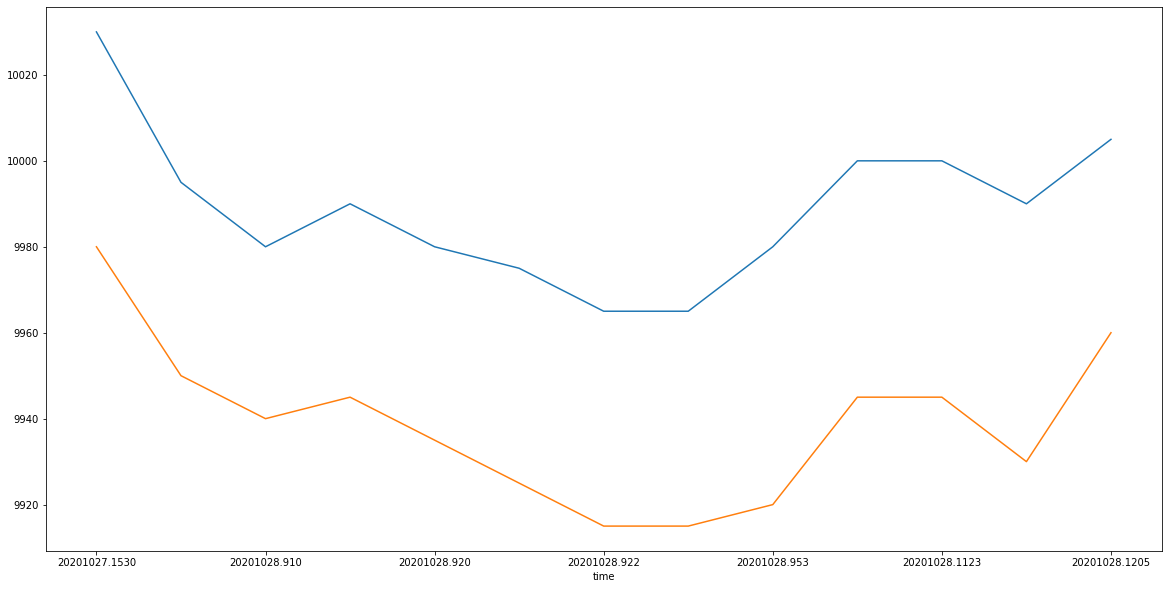

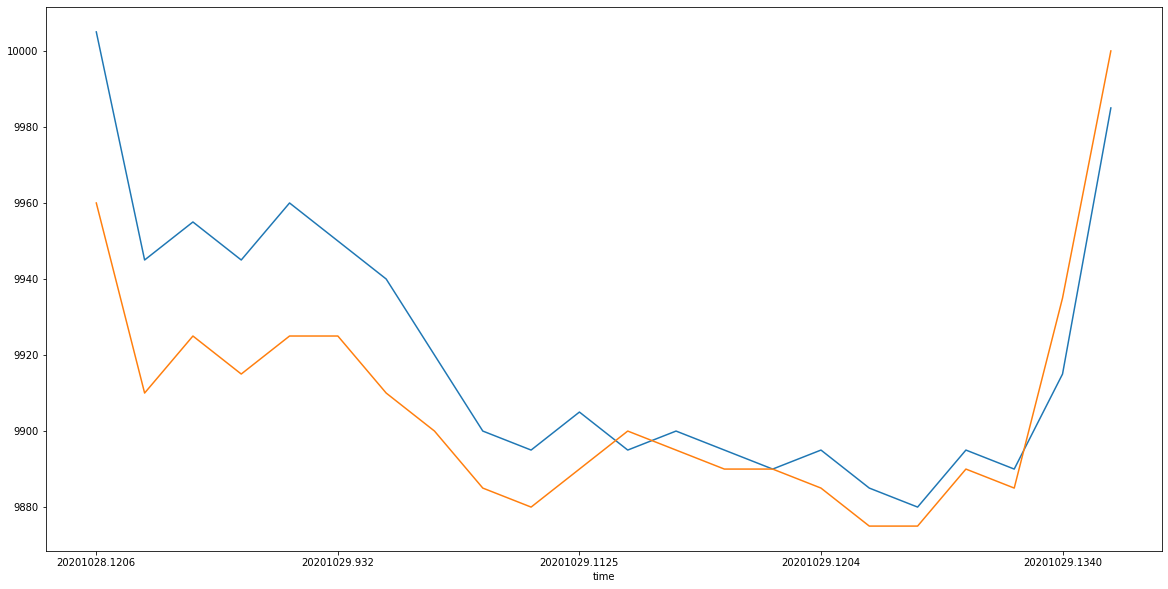

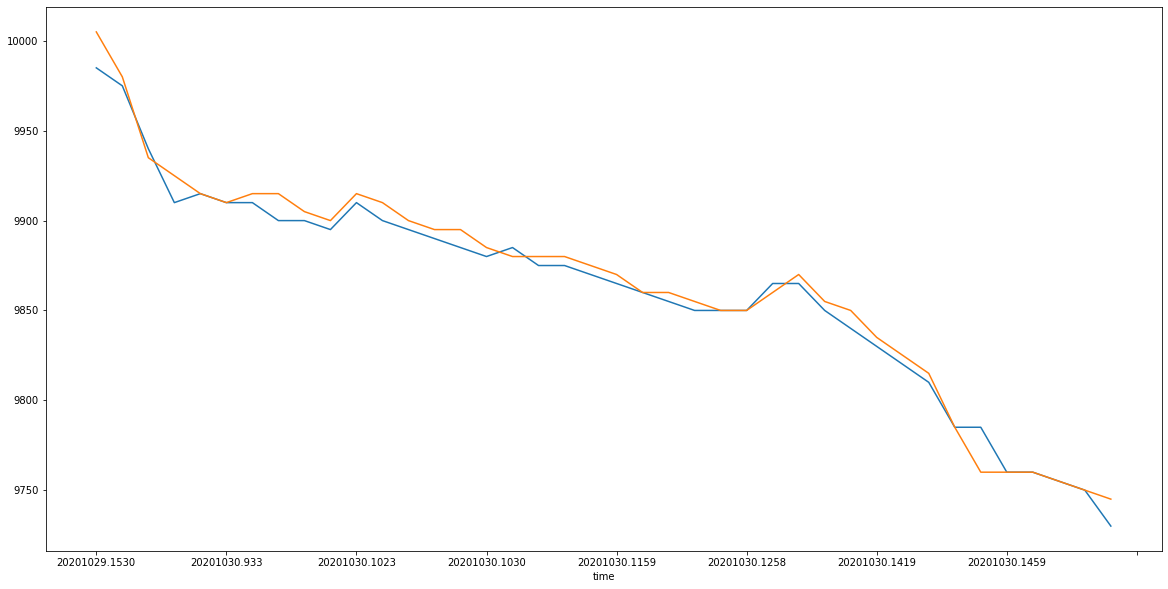

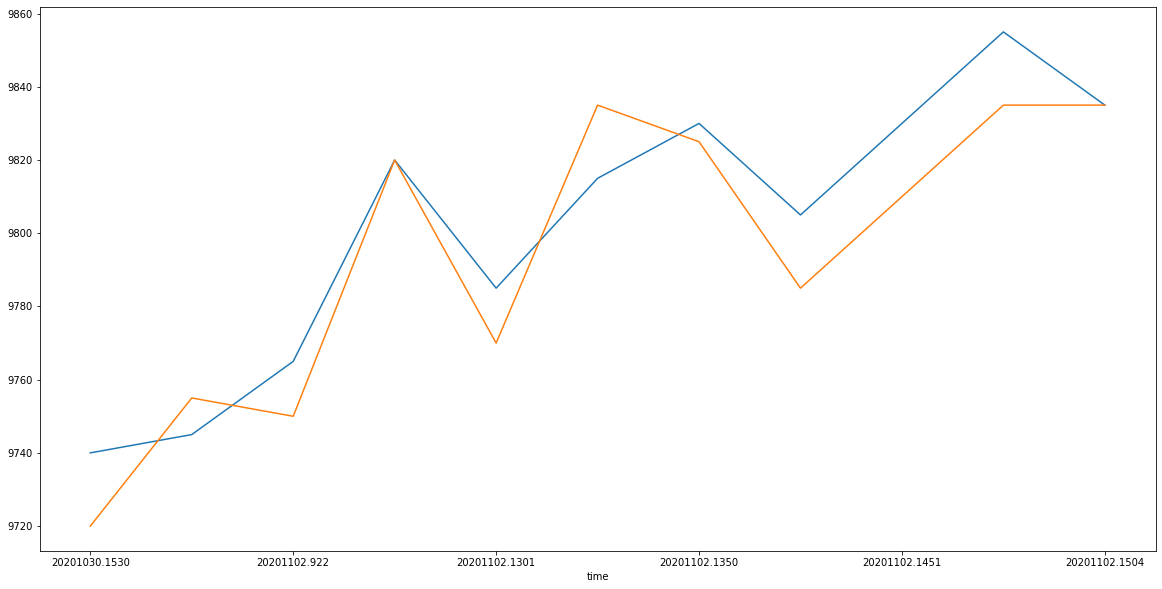

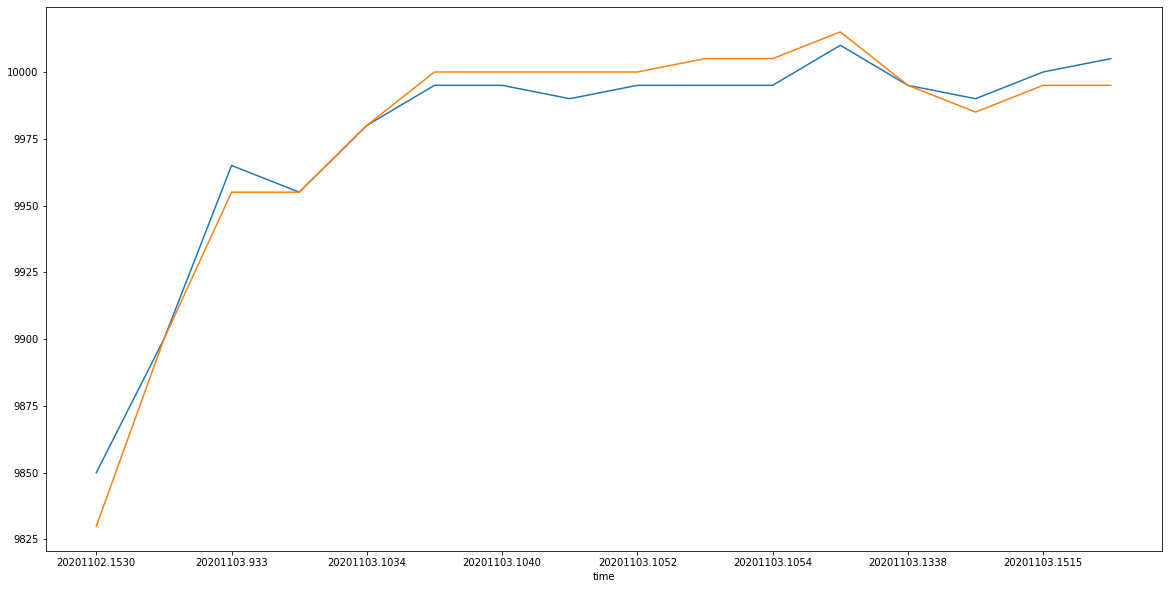

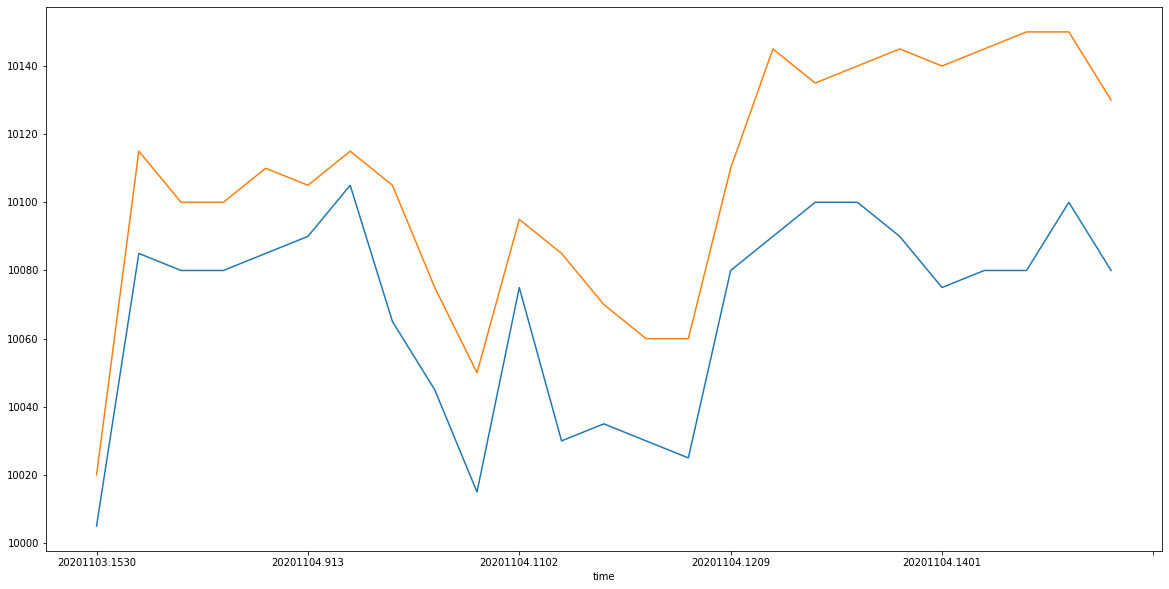

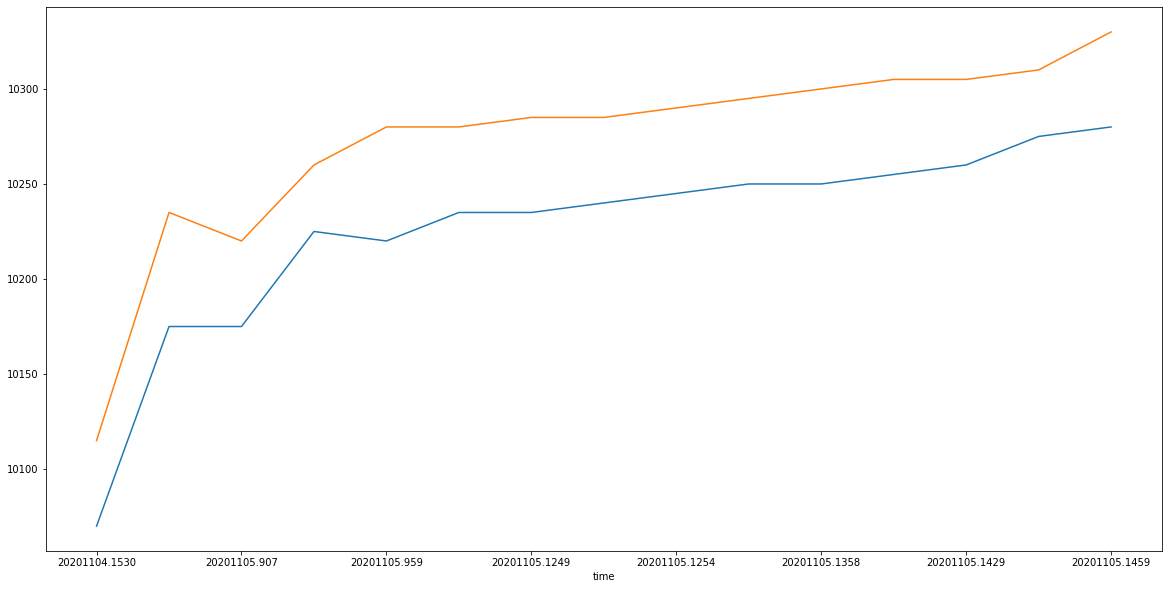

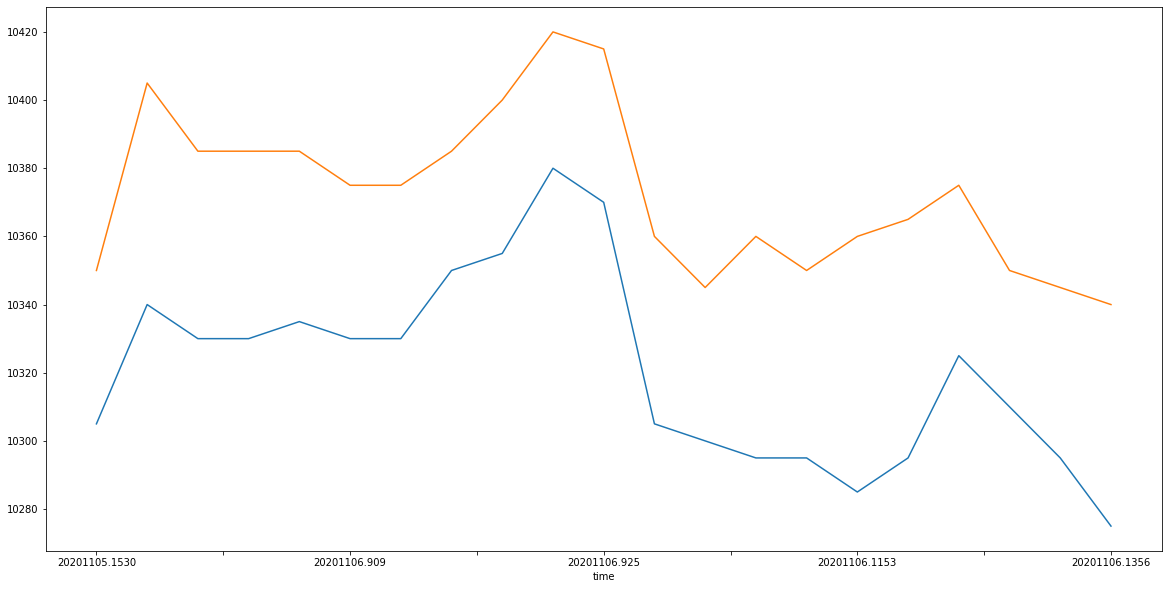

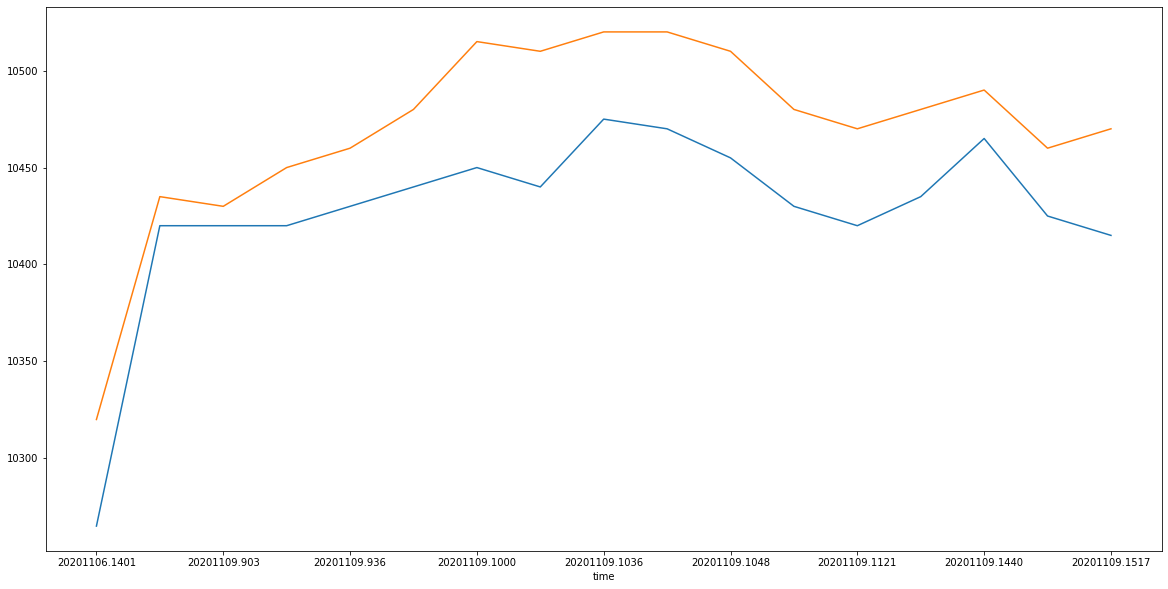

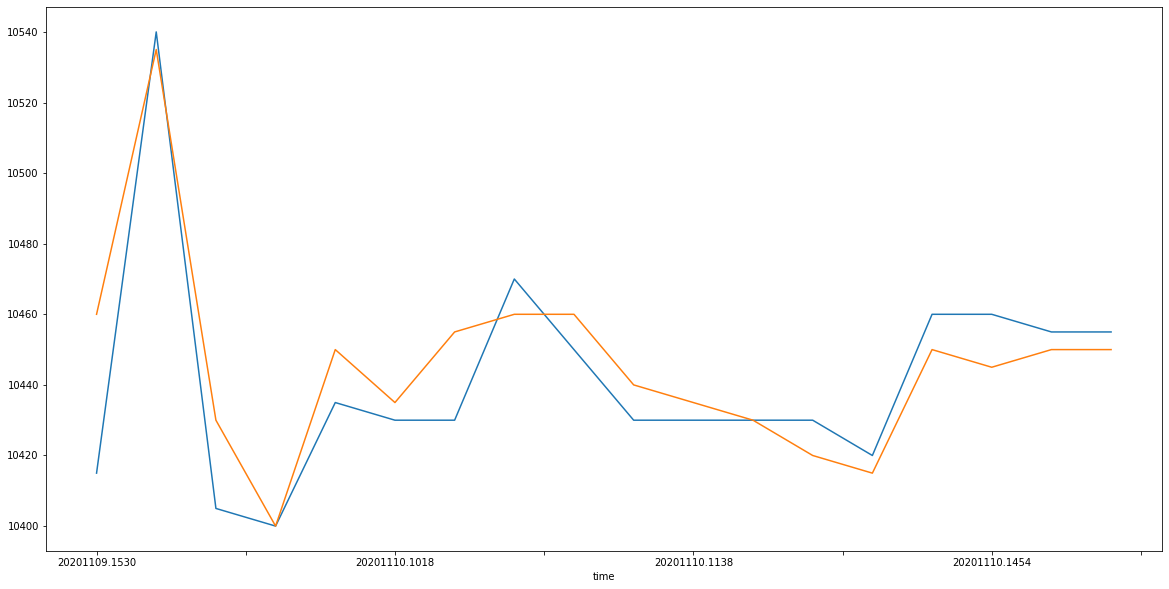

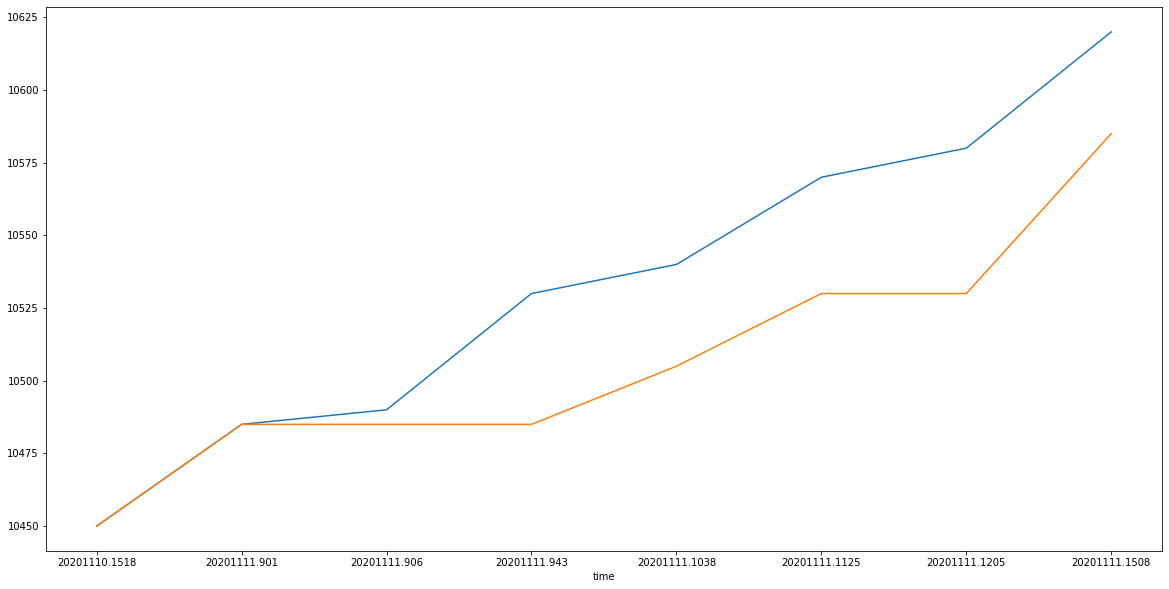

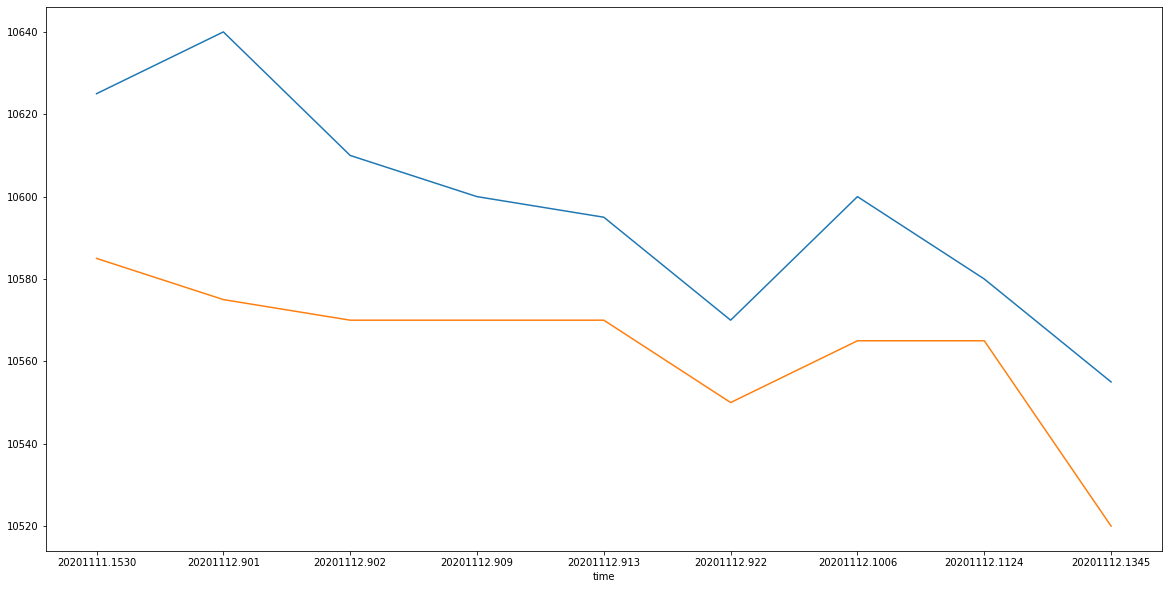

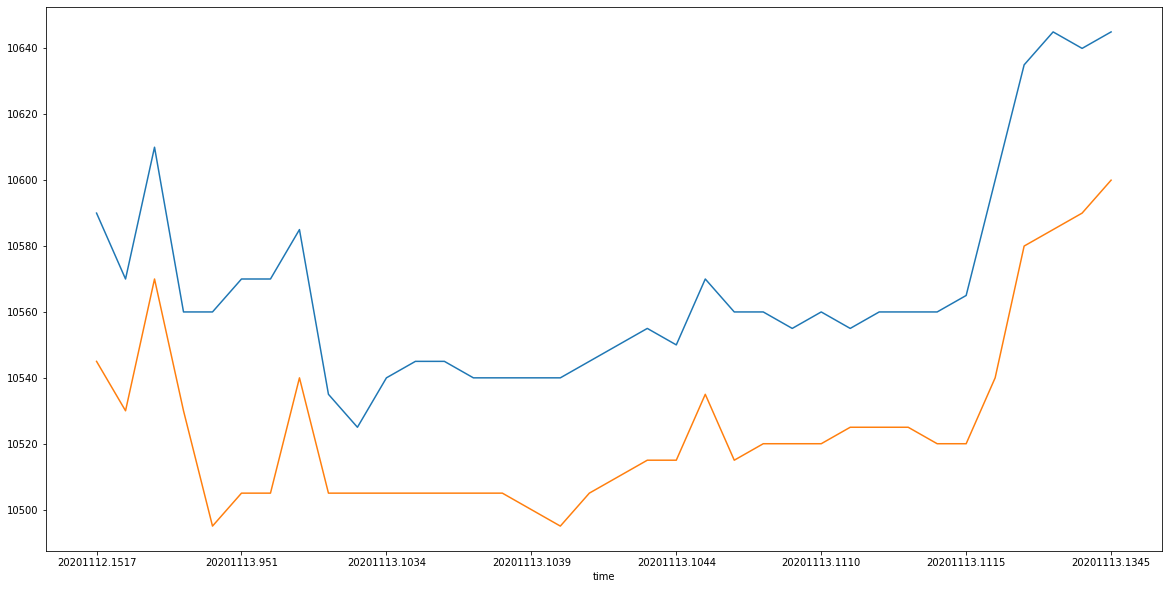

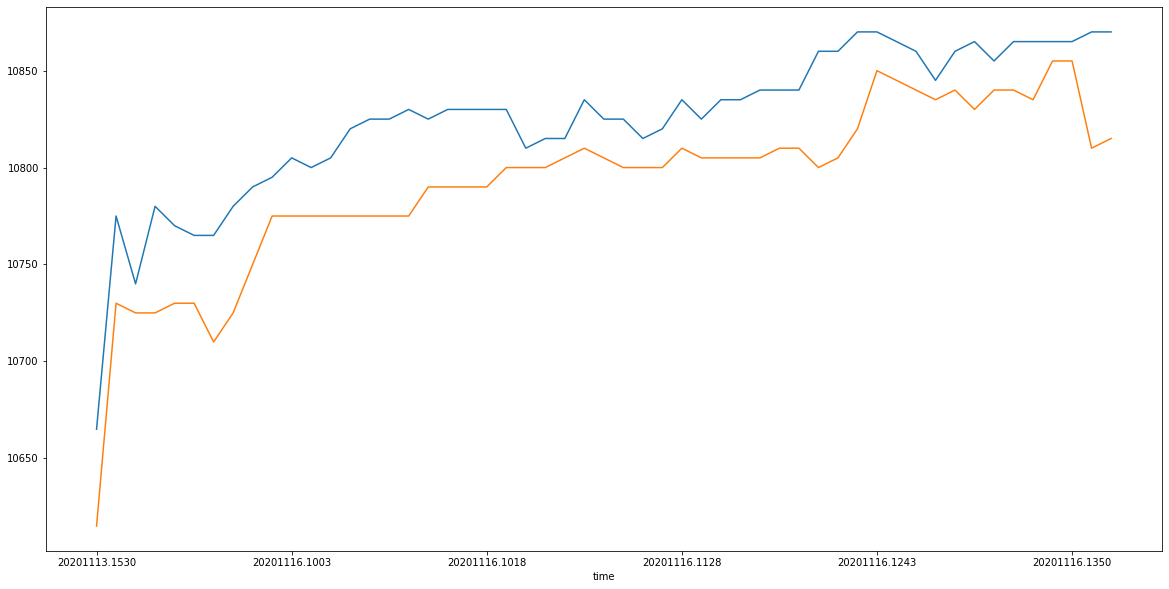

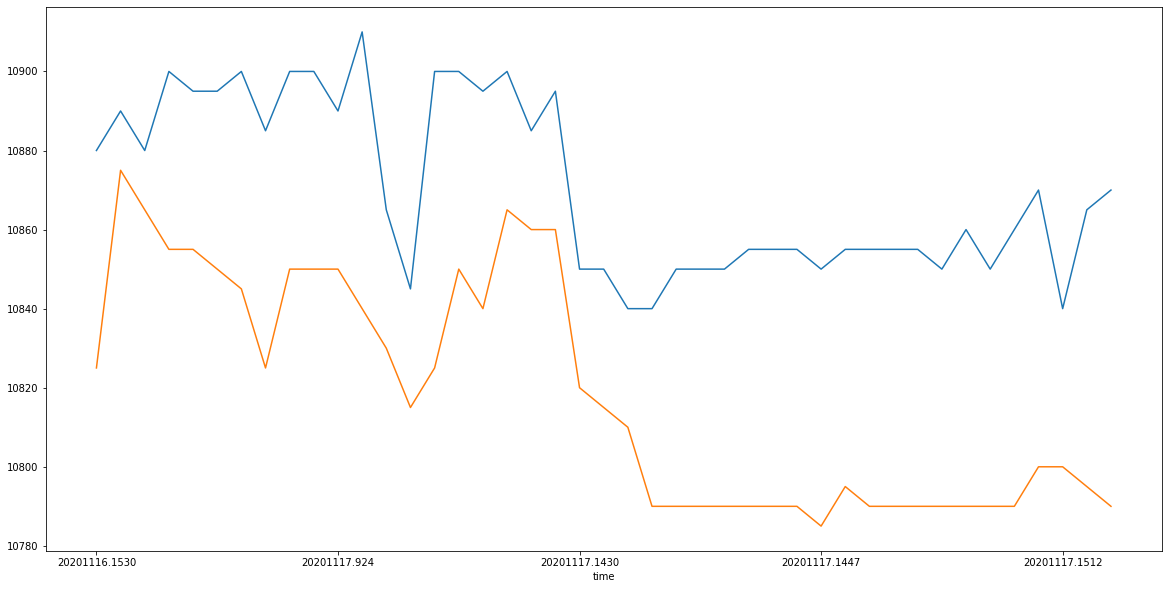

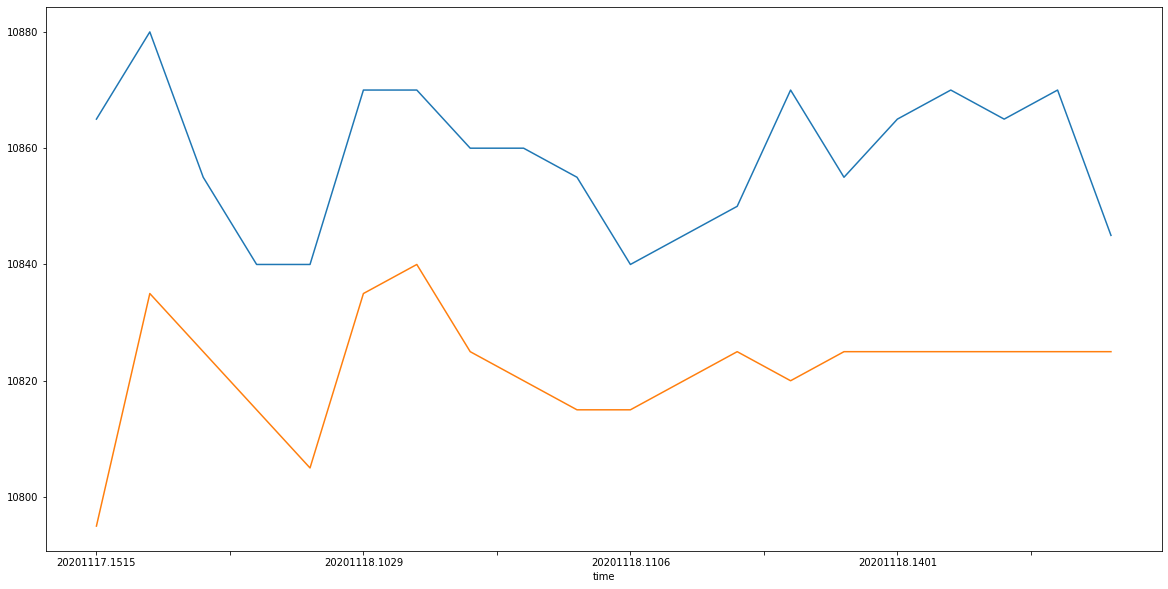

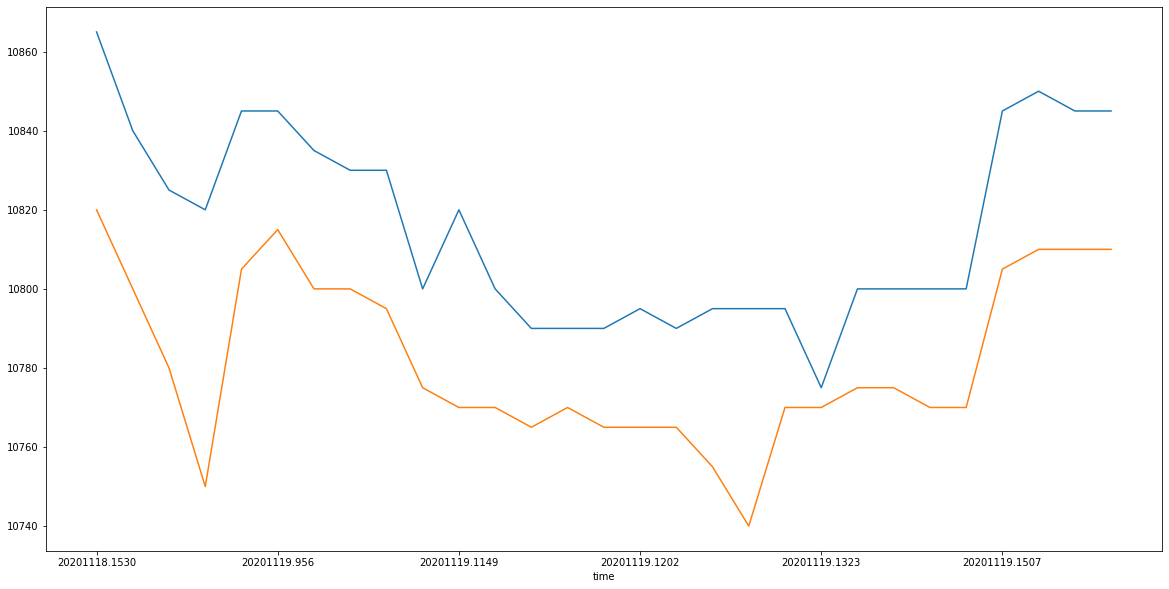

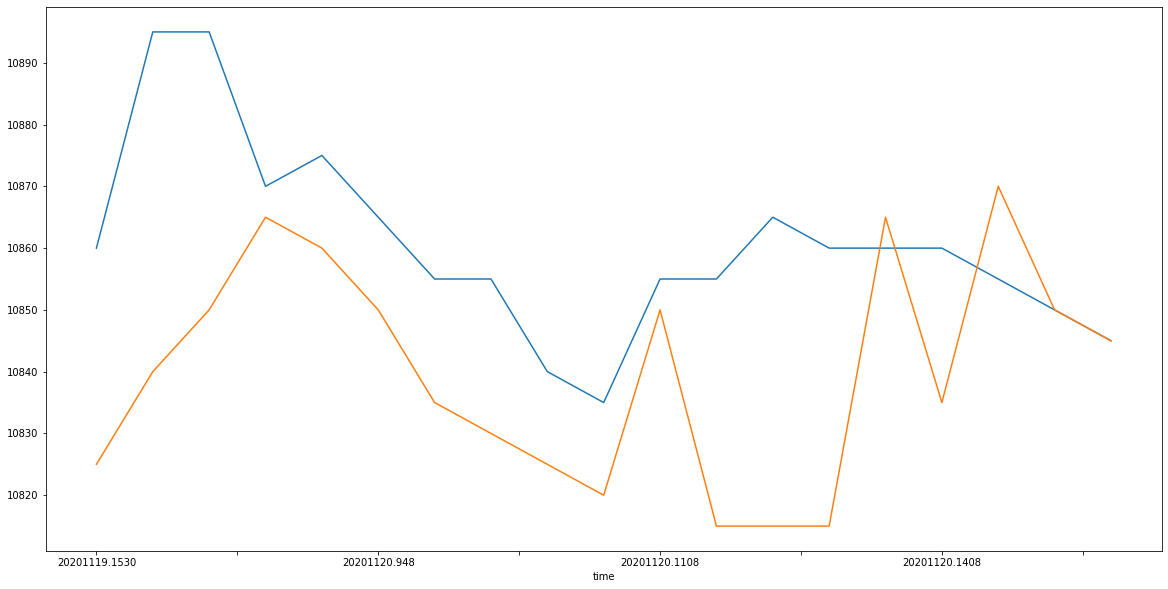

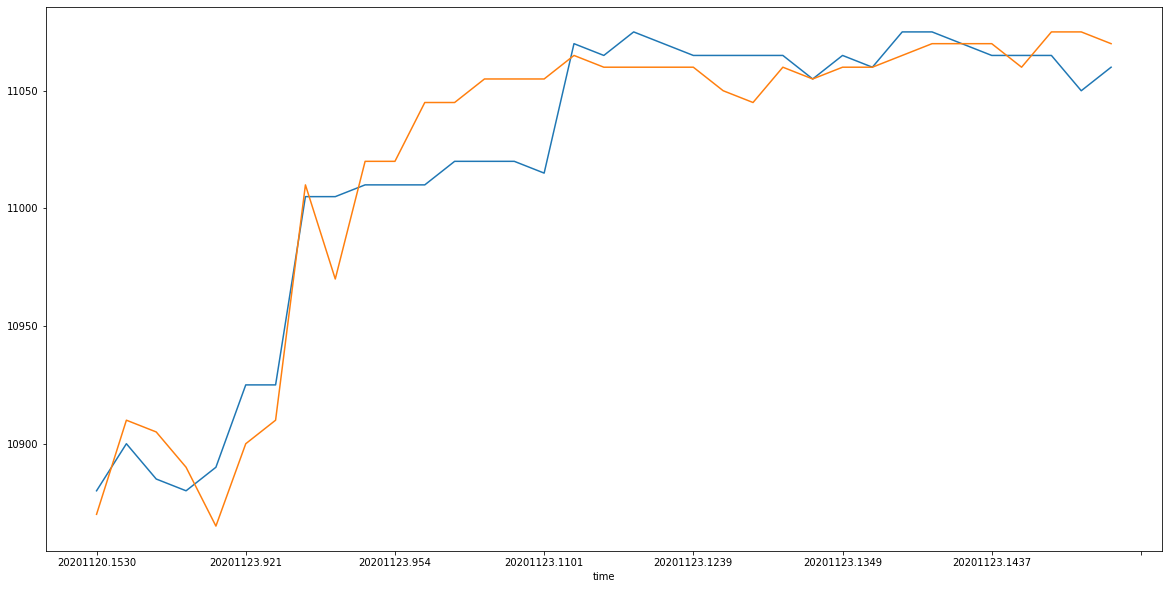

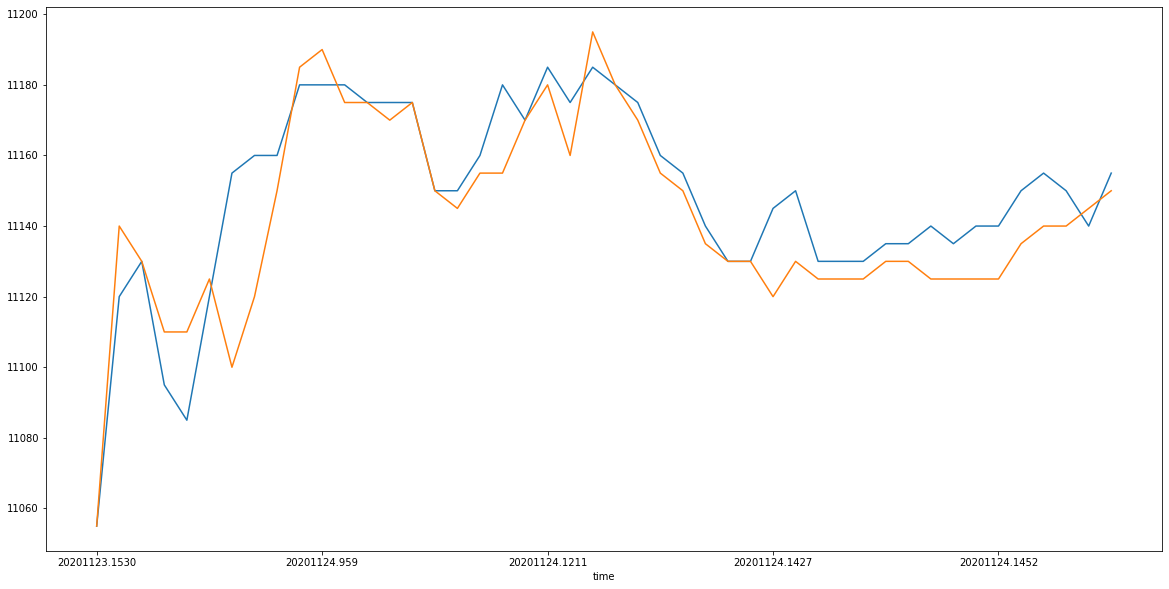

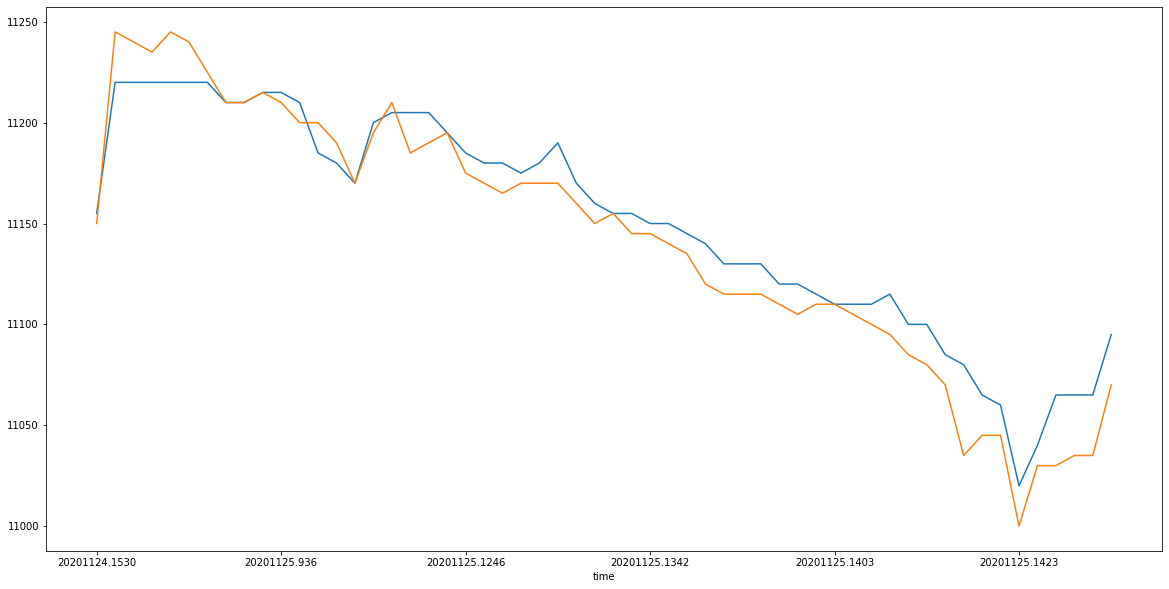

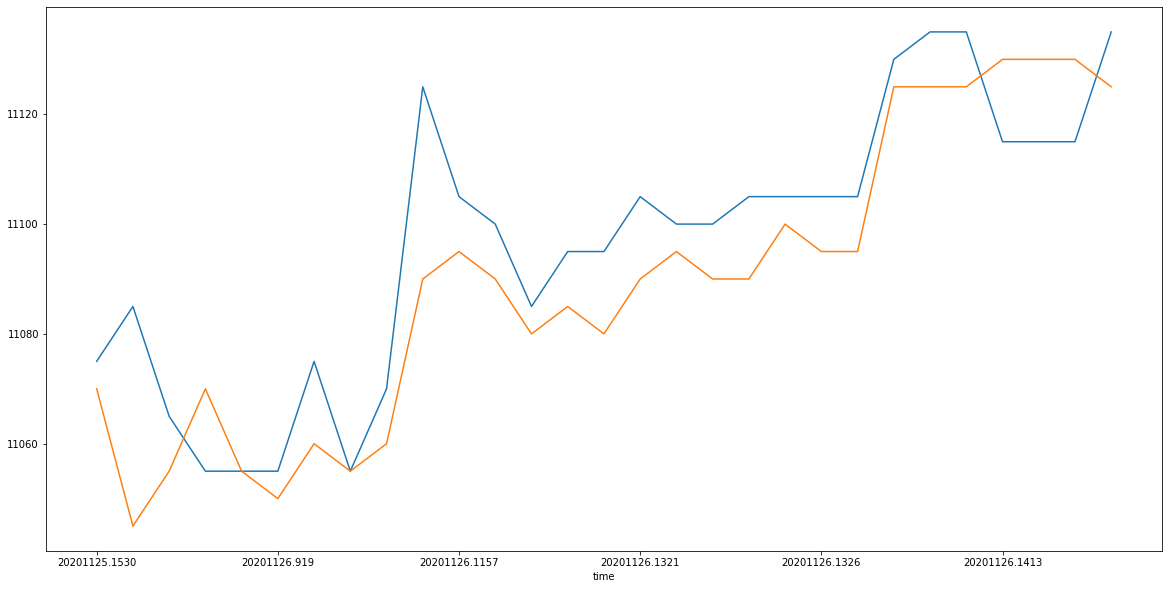

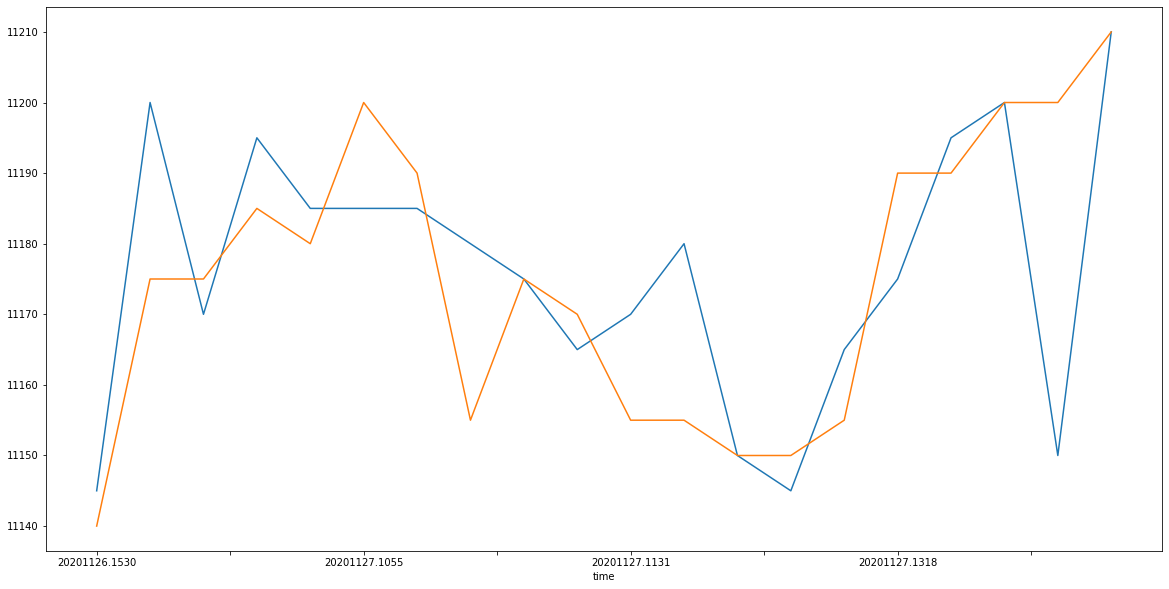

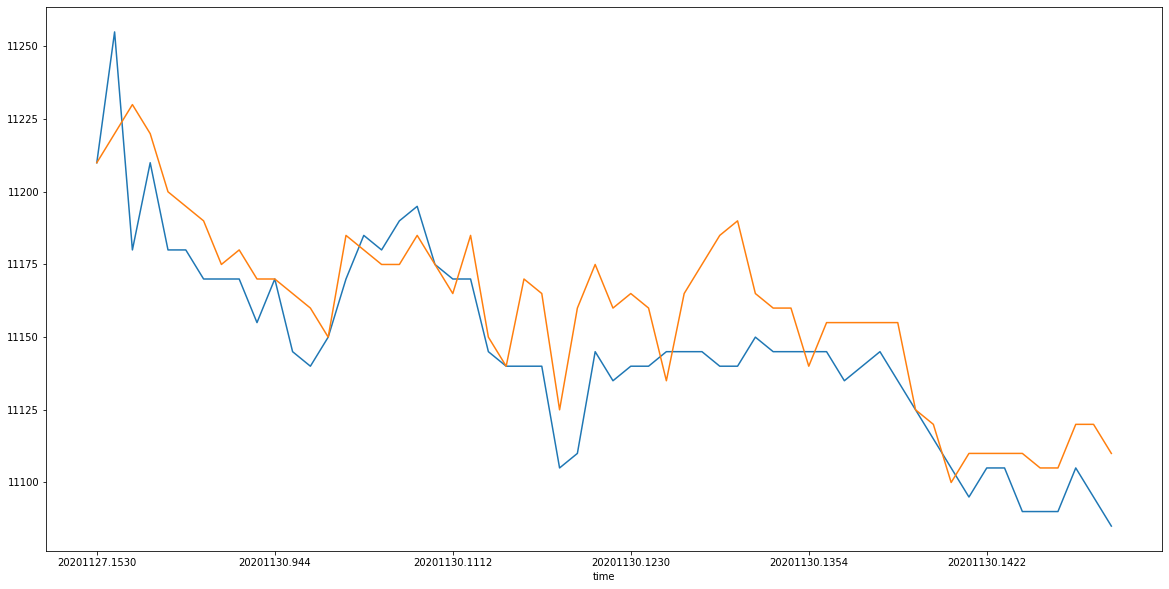

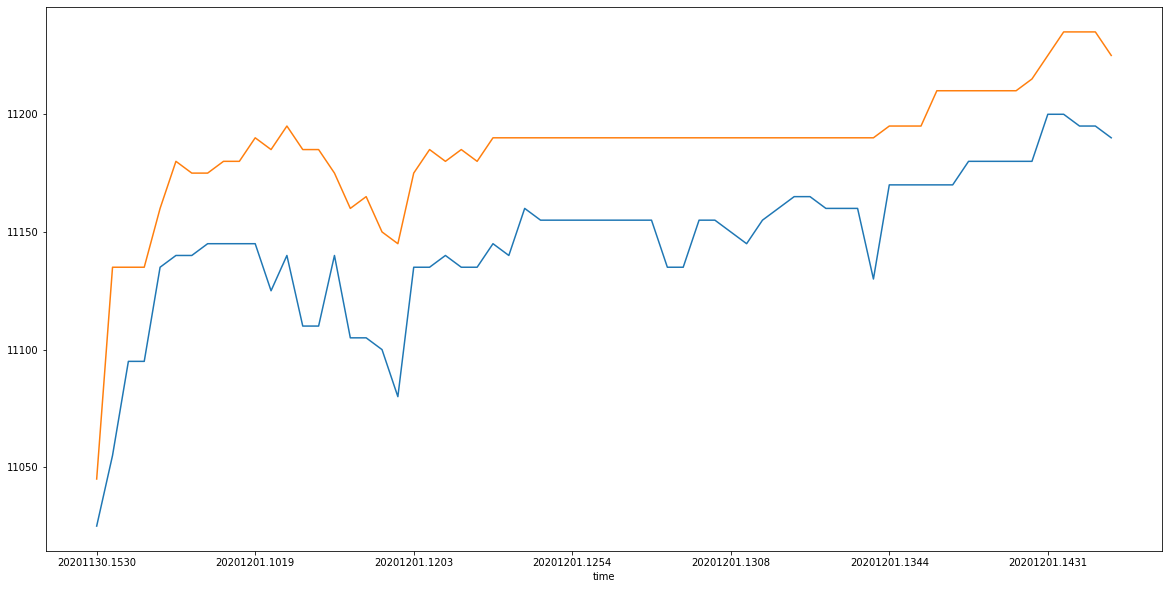

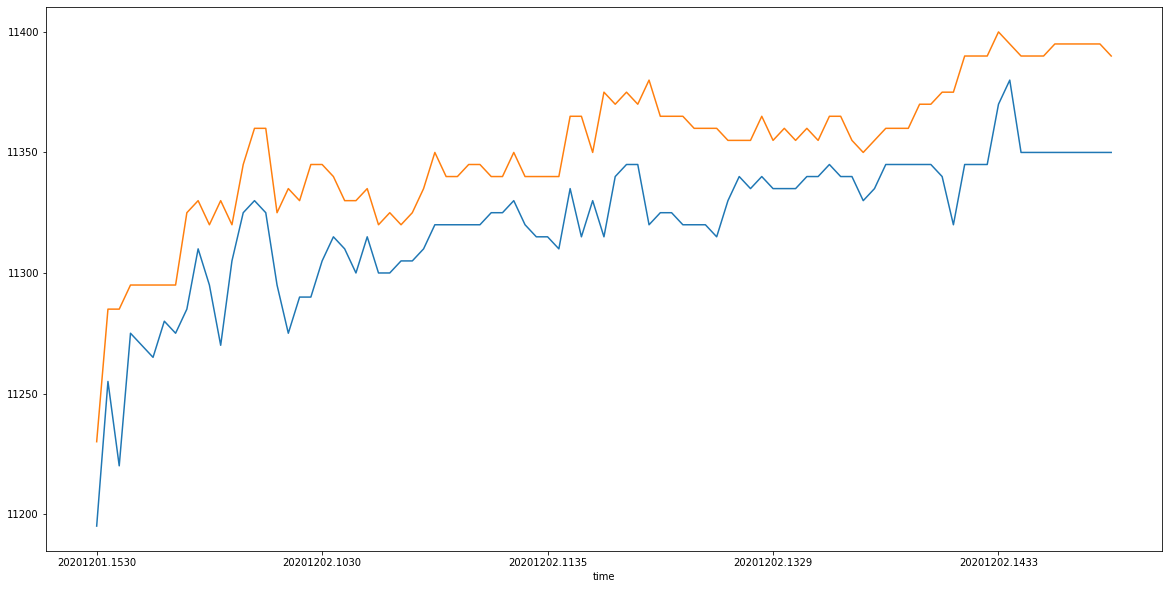

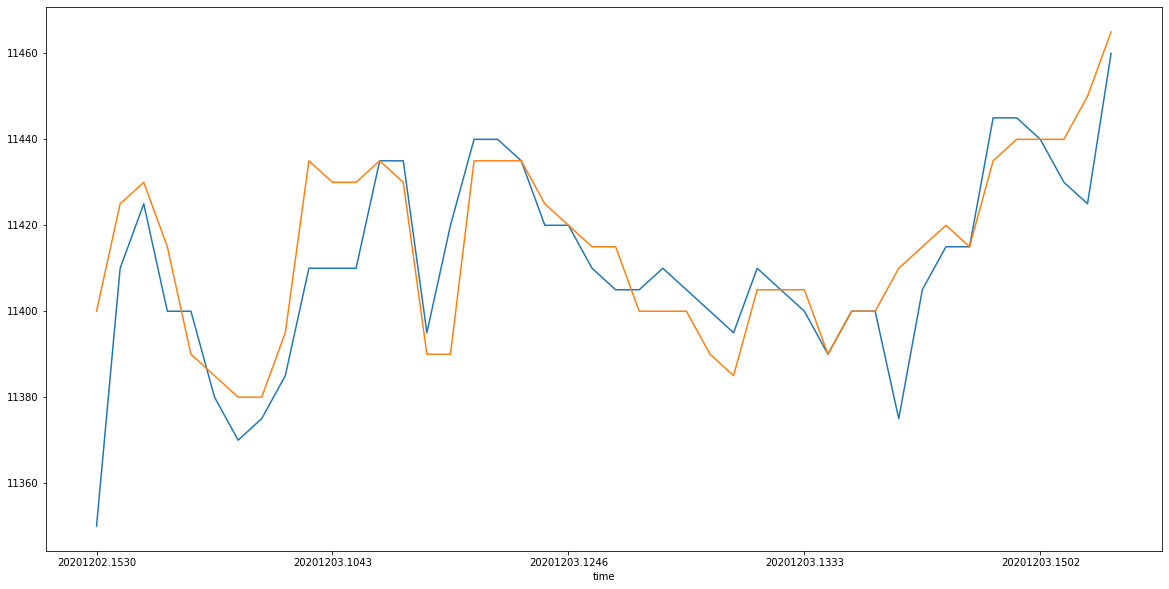

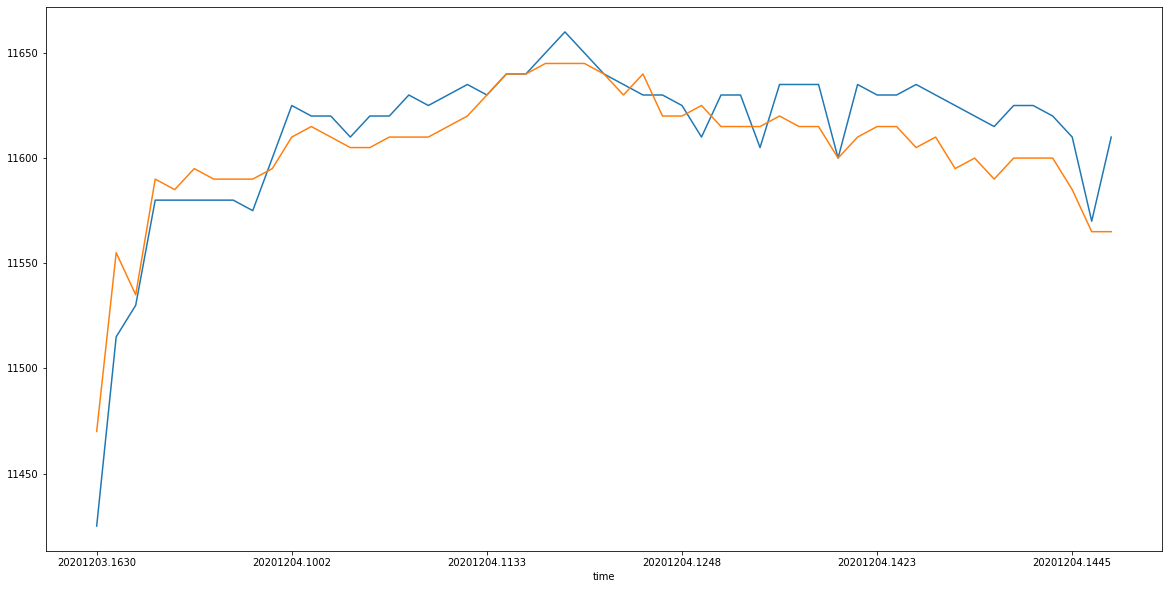

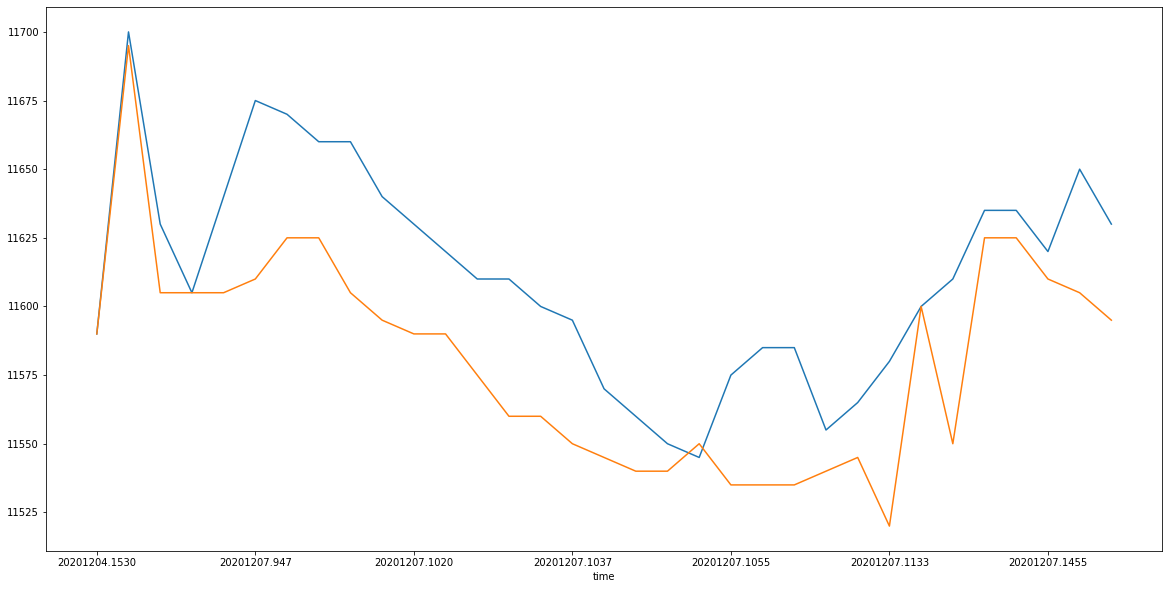

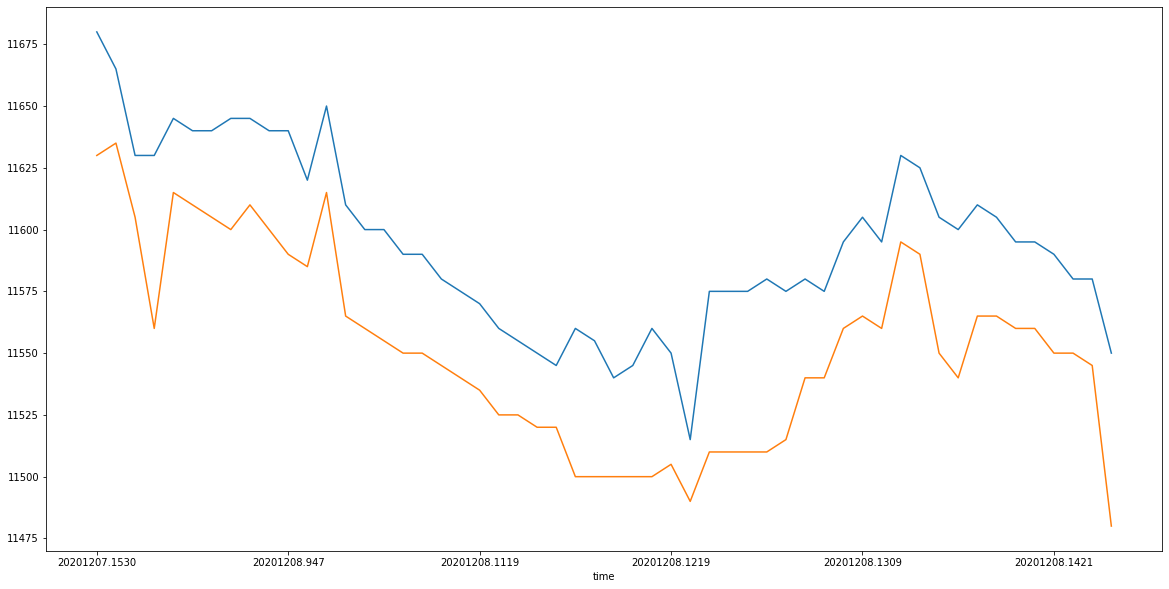

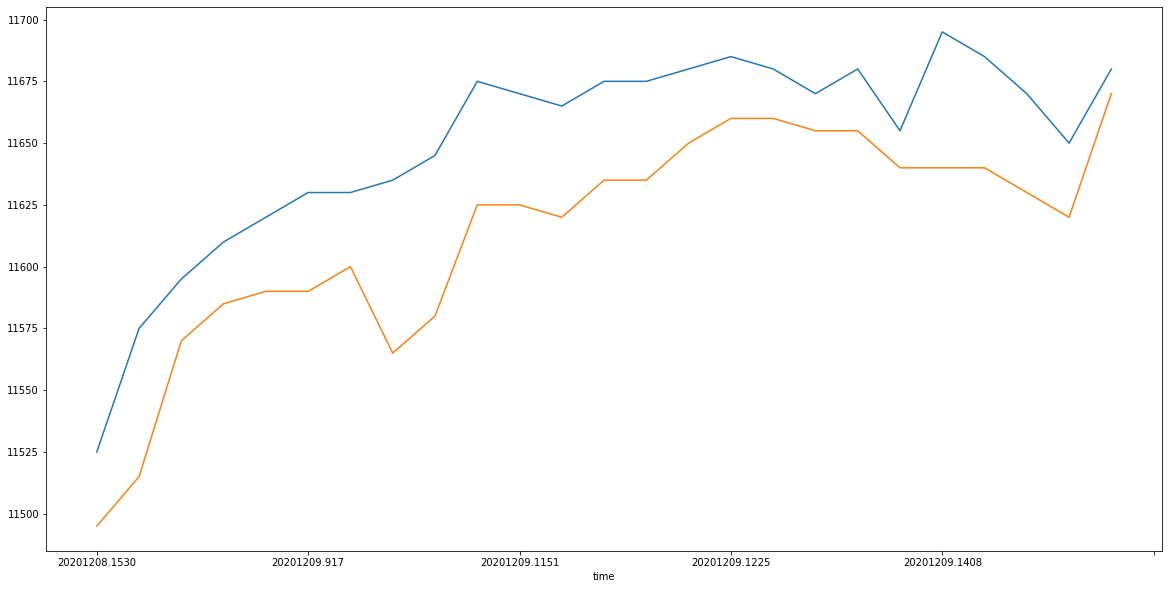

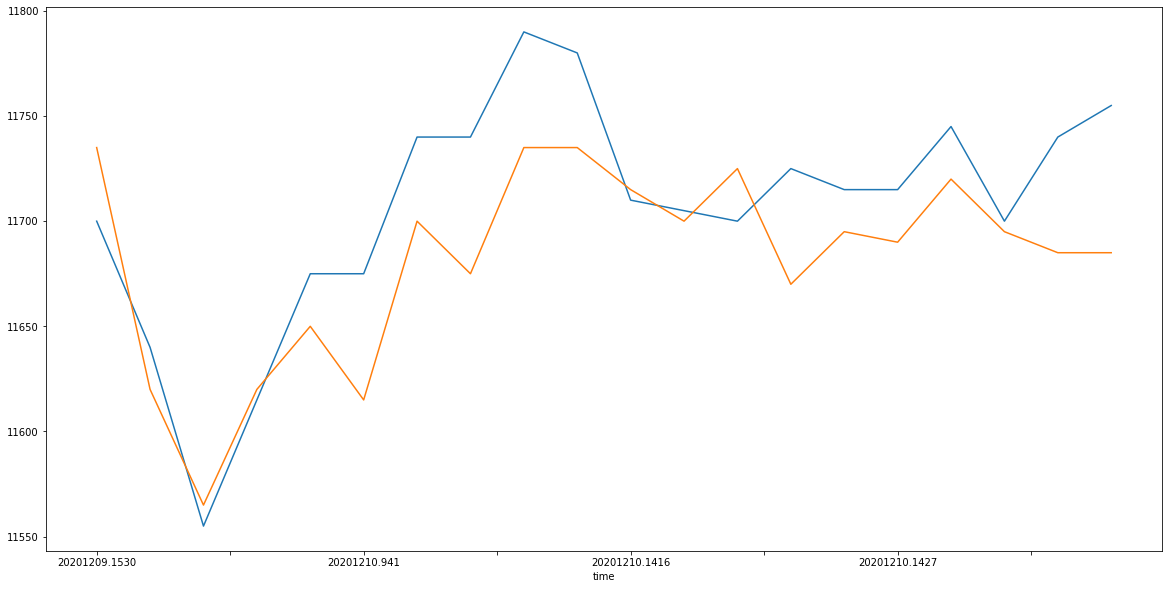

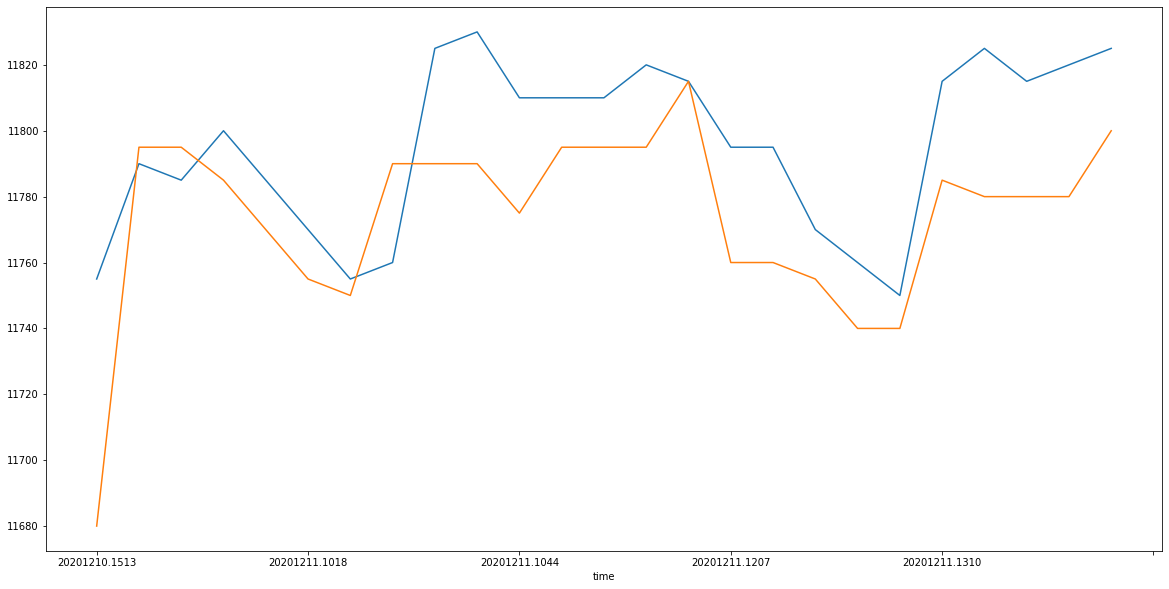

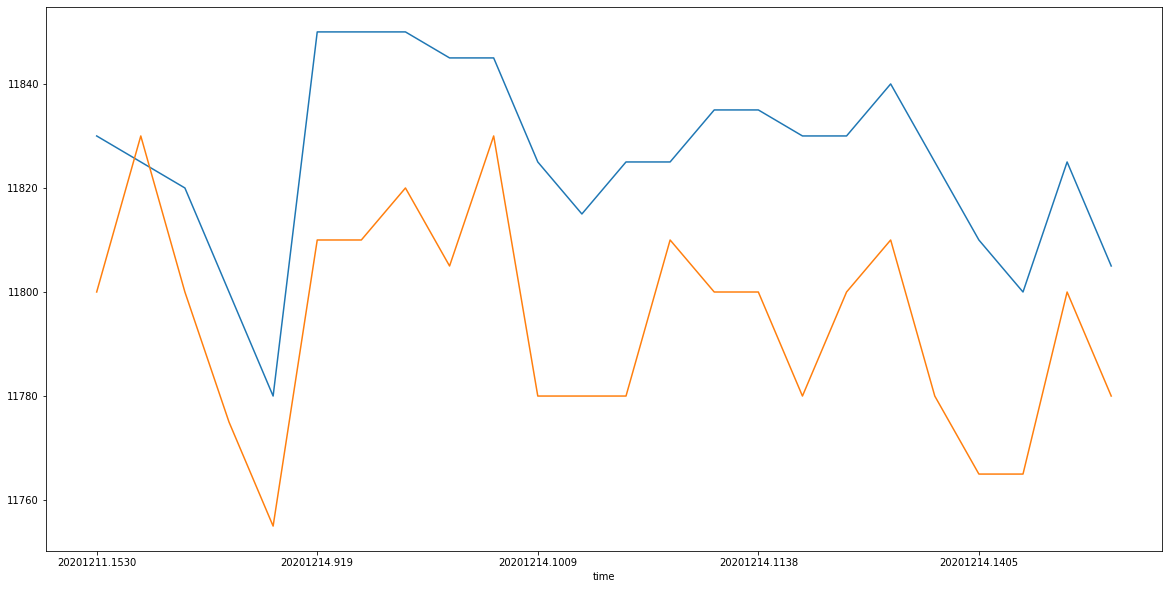

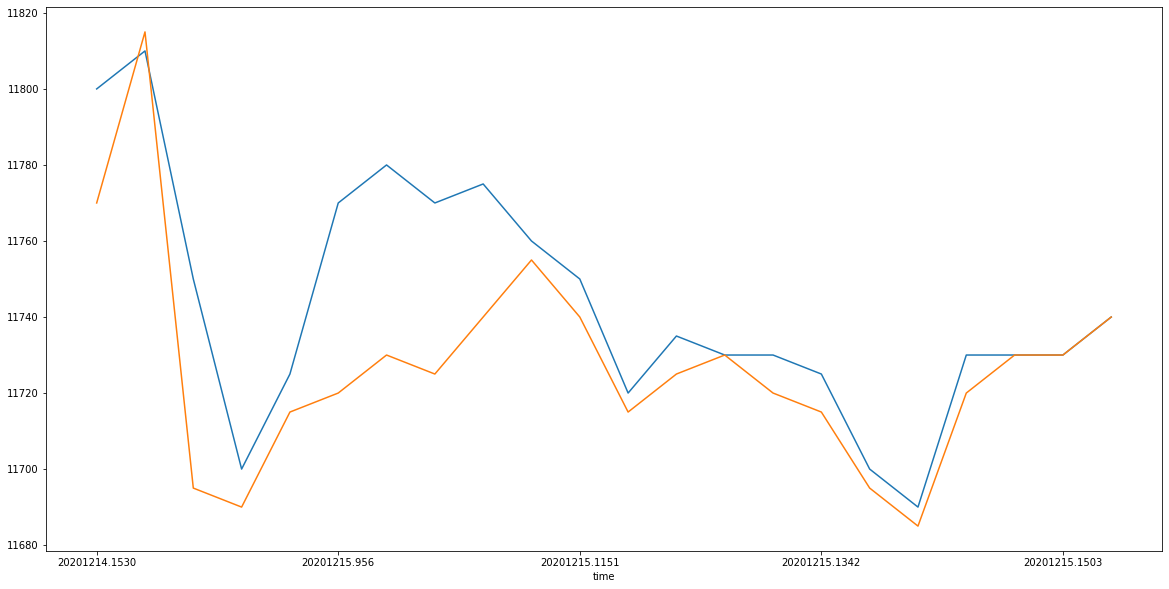

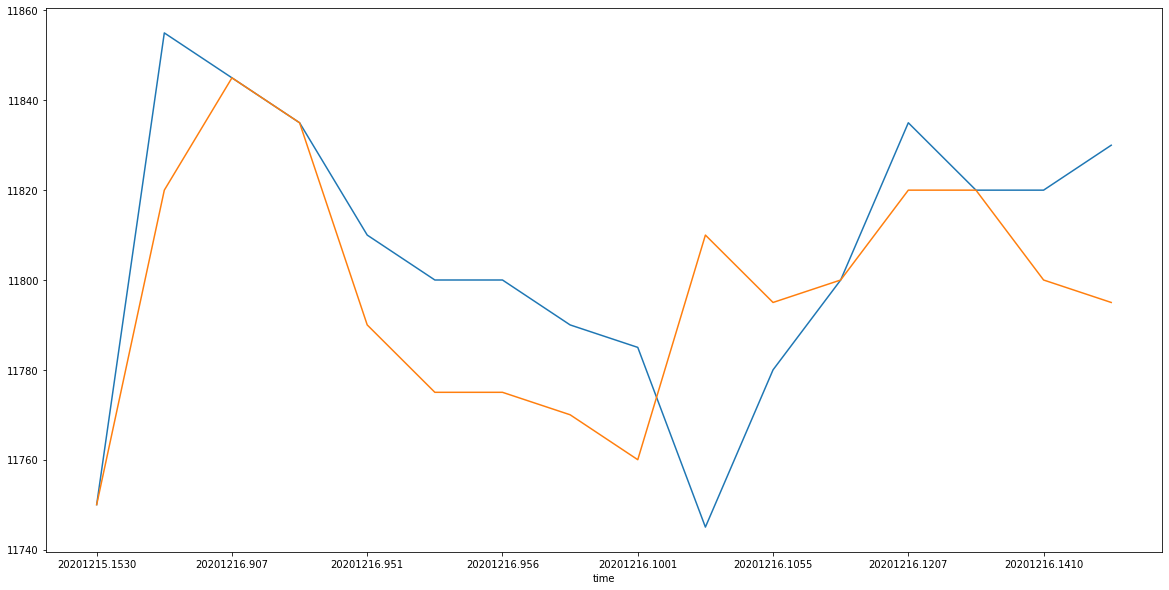

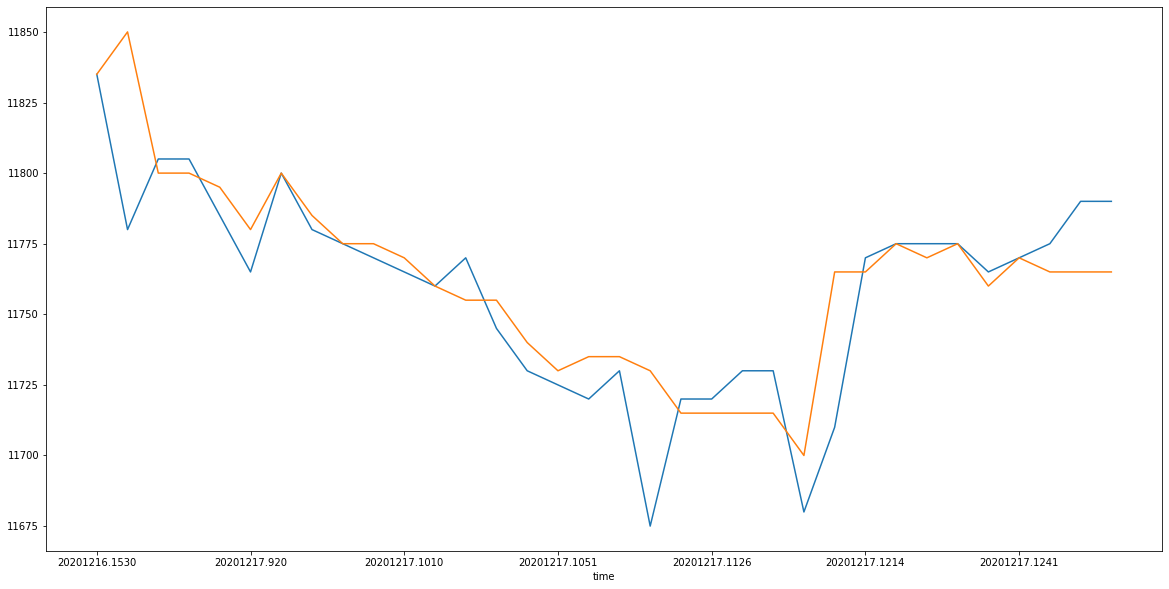

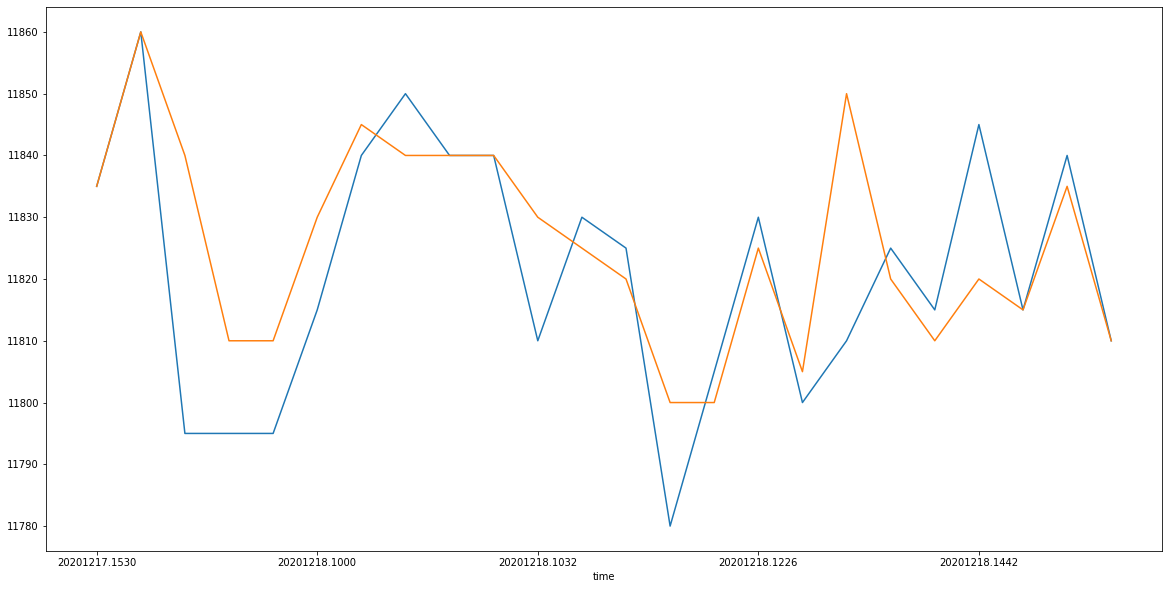

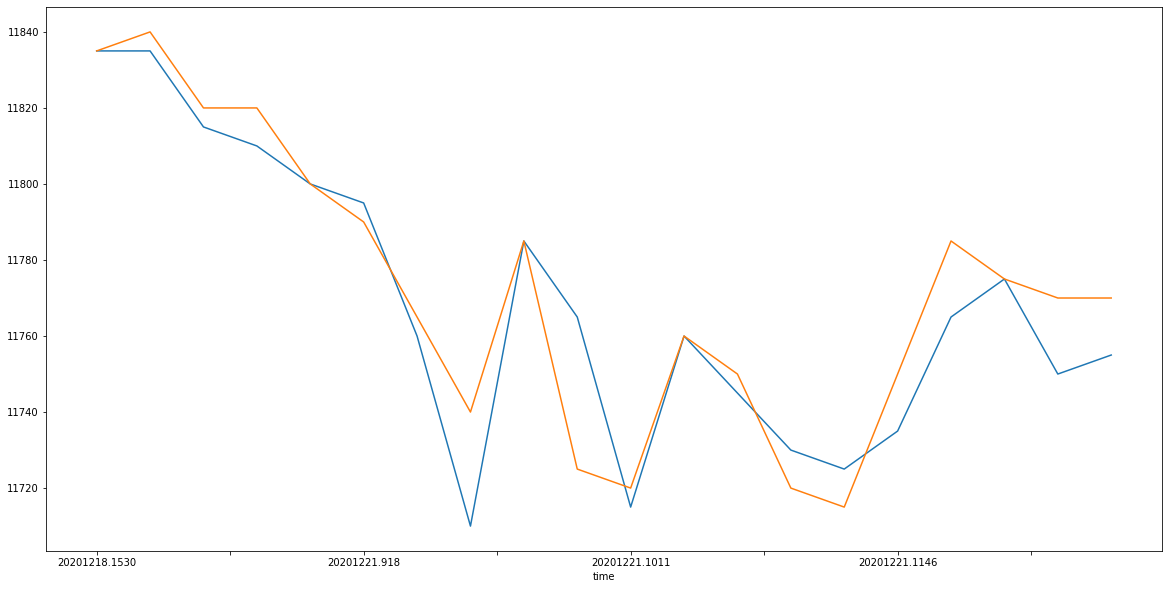

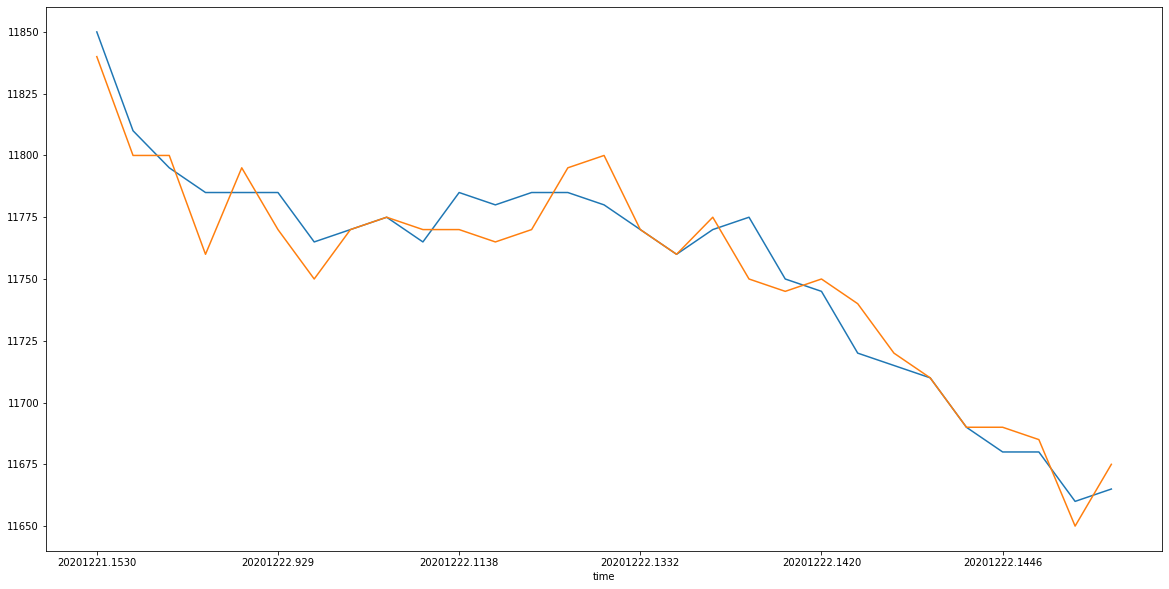

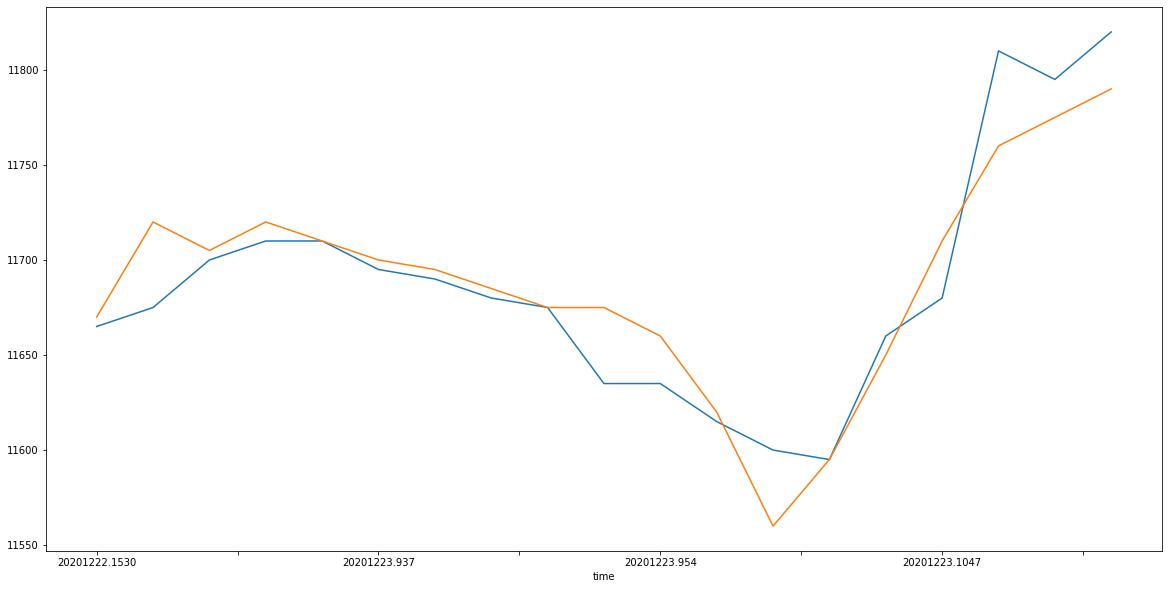

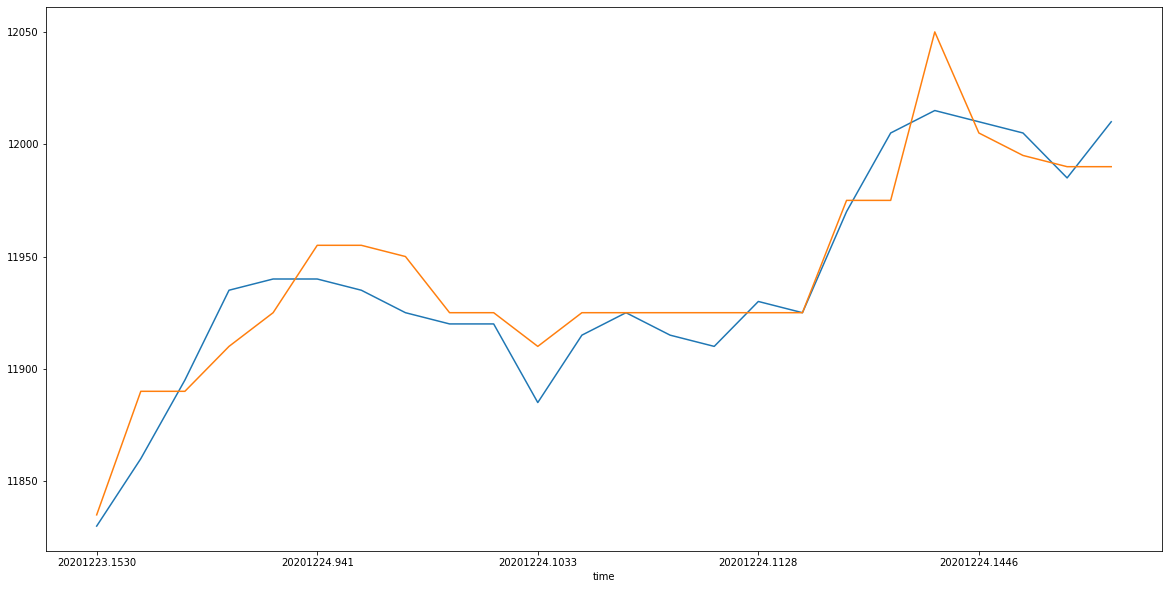

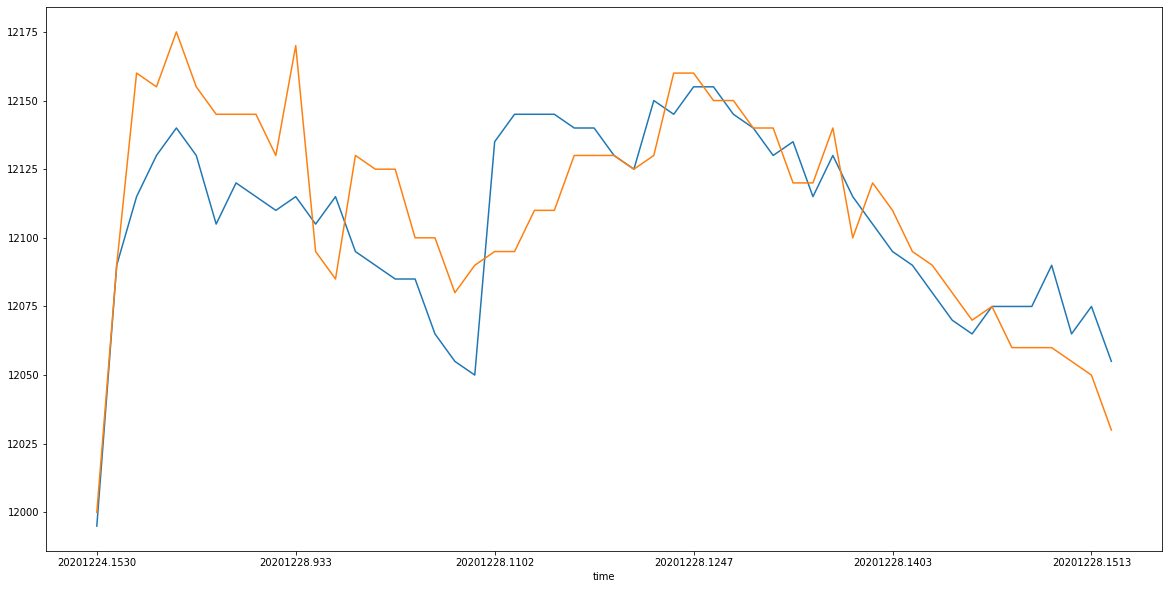

In [ ]:
for date in calender:
    plt.rcParams["figure.figsize"] = (20, 10)
    # temp_high = df[date]['kodex_inv_dayret']*(-1) +0.0003
    # temp_low = df[date]['kodex_inv_dayret']*(-1) -0.0003
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    df[date]['kodex_active'].plot()
    df[date]['tiger_active'].plot()
    # df[date]['kodex200_dayret'].plot()
    # (df[date]['kodex_inv_dayret']*-1).plot()
    # df[date]['kodex_active_dayret'].plot()
    # df[date]['tiger_active_dayret'].plot()
    # df[date]['kodex200_cumret'].plot()
    # df[date]['kodex_active_cumret'].plot()
    # df[date]['tiger_active_cumret'].plot()
    # df[date]['dayret_spread'].plot()
    # df[date]['cumret_spread_kodex'].plot()
    # df[date]['cumret_spread_tiger'].plot()
    # df[date]['ma5_kodex'].plot()
    # df[date]['ma10_kodex'].plot()
    # df[date]['ma20_tiger'].plot()
    # df[date]['ma30_tiger'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

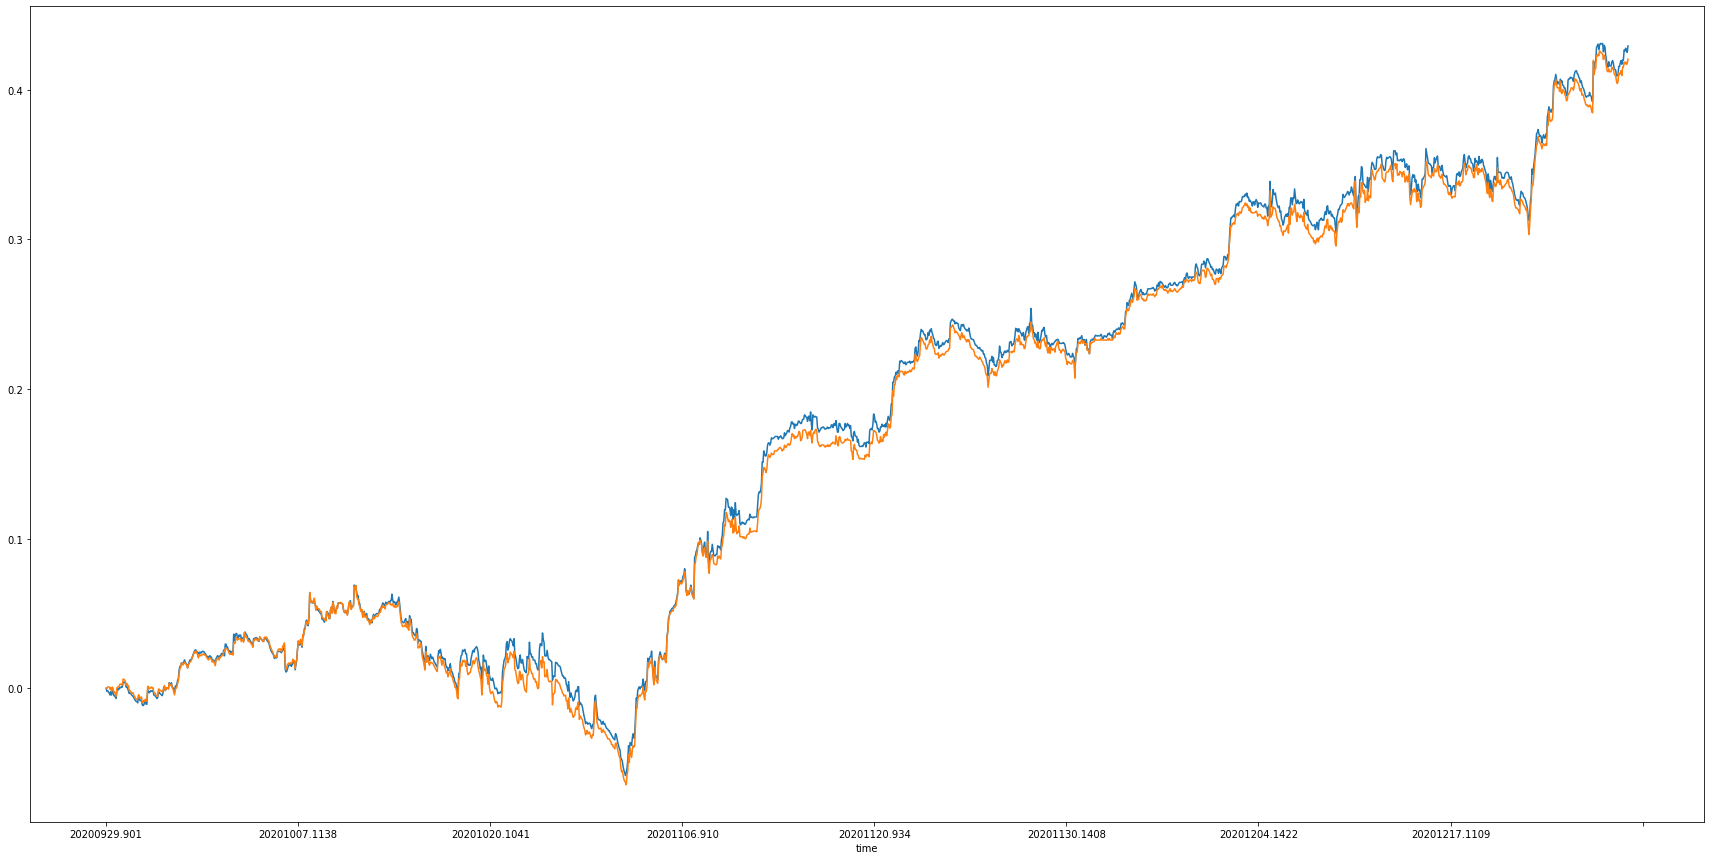

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['cumret_spread_kodex'].plot()
temp['cumret_spread_tiger'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [4]:
cd bidask

/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [5]:
now = '20210122'

kodex_active_bidask = pd.read_pickle('KODEX 혁신기술테마액티브_'+now)
tiger_active_bidask = pd.read_pickle('TIGER AI코리아그로스액티브_'+now)

bidask =  pd.merge(left = kodex_active_bidask , right = tiger_active_bidask, how = "inner", on = "time")
bidask.columns = ['kodex_active_bid','kodex_active_ask','tiger_active_bid','tiger_active_ask']
kodex_active_ask = bidask['kodex_active_ask']
kodex_active_bid = bidask['kodex_active_bid']
tiger_active_ask = bidask['tiger_active_ask']
tiger_active_bid = bidask['tiger_active_bid']
bidask

,kodex_active_bid,kodex_active_ask,tiger_active_bid,tiger_active_ask
time,,,,
095243,13885,13850,13760,13735
095246,13885,13850,13760,13735
095248,13885,13850,13760,13735
095251,13885,13850,13760,13735
095253,13885,13850,13760,13735
...,...,...,...,...
151951,13790,13775,13730,13725
151953,13800,13775,13730,13720
151956,13800,13775,13725,13720


## - bidask 스프레드

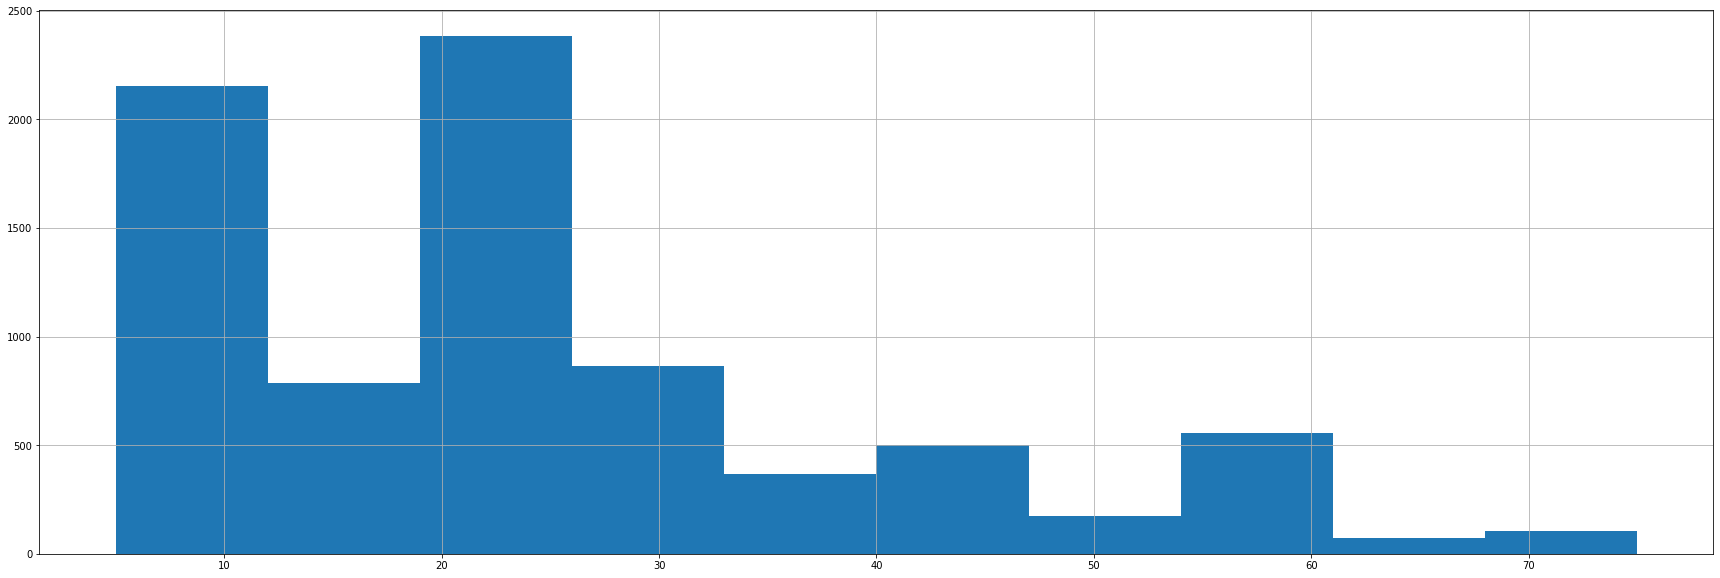

In [7]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = tiger_active_bid-tiger_active_ask
bidask_spread.hist()

# kodex_active_ask_tiger_active_bid spread freaquency (포지션시작)

80     1359
95      936
60      805
100     677
65      643
110     638
70      546
75      512
90      409
115     403
85      266
55      259
125     170
105     120
120      69
50       35
45       32
130      29
135      17
150      16
145       9
40        6
140       5
dtype: int64


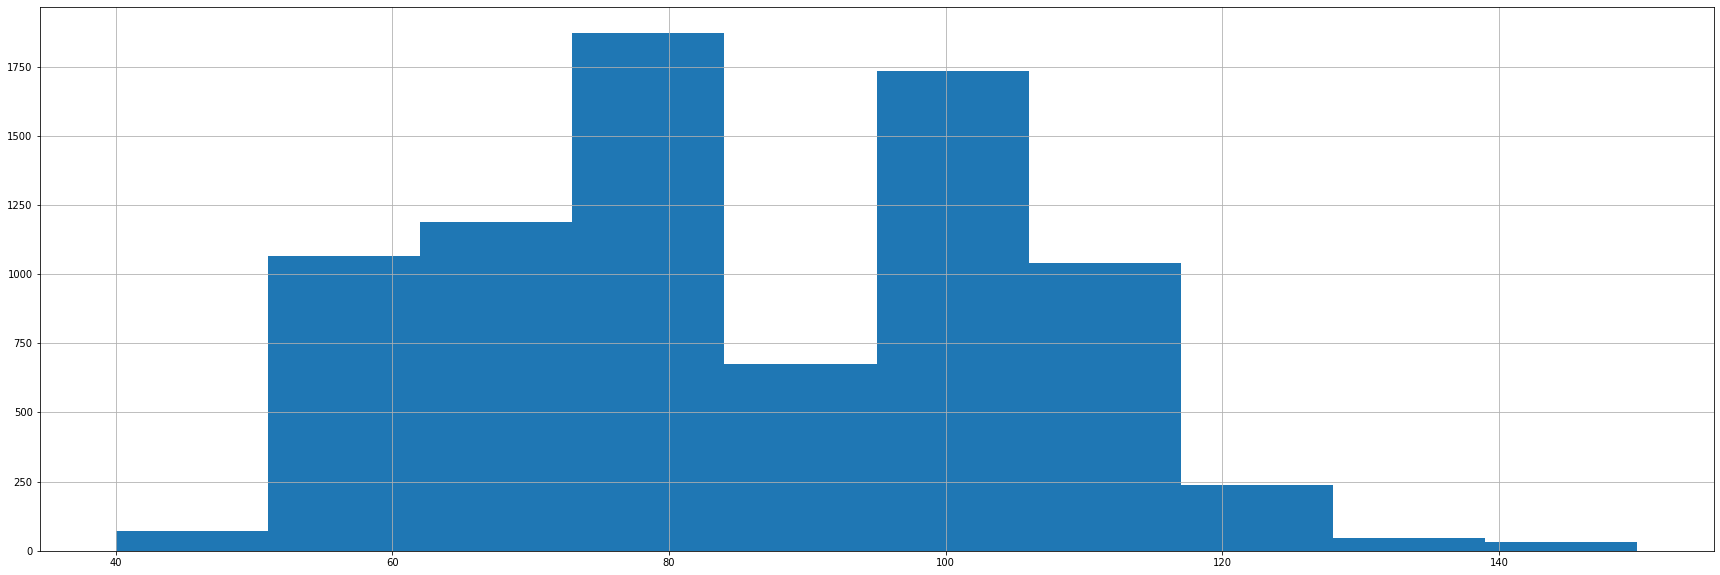

In [8]:
start = kodex_active_ask - tiger_active_bid
start.hist()
start = start.value_counts() 
print(start[:30])

# tiger_active_ask_kodex_active_bid spread freaquency    (청산포지션)

-105    751
-130    510
-125    496
-155    484
-145    448
-85     427
-170    375
-165    366
-135    335
-160    335
-175    316
-140    315
-180    290
-110    286
-150    267
-115    252
-80     241
-120    230
-185    223
-190    195
-75     177
-90     176
-95     166
-100    160
-195    113
-200     15
-70      11
-65       1
dtype: int64


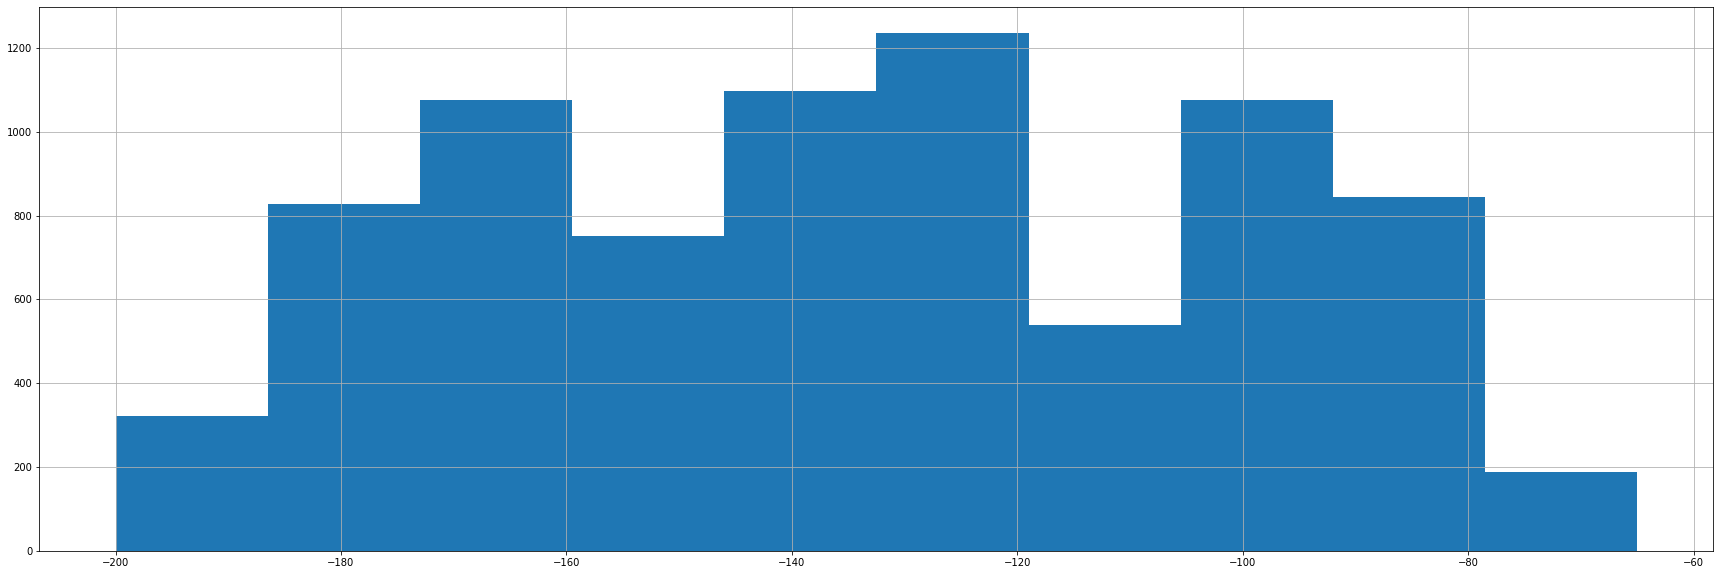

In [9]:
finish = tiger_active_ask - kodex_active_bid
finish.hist()
finish = finish.value_counts() 
print(finish[:30])

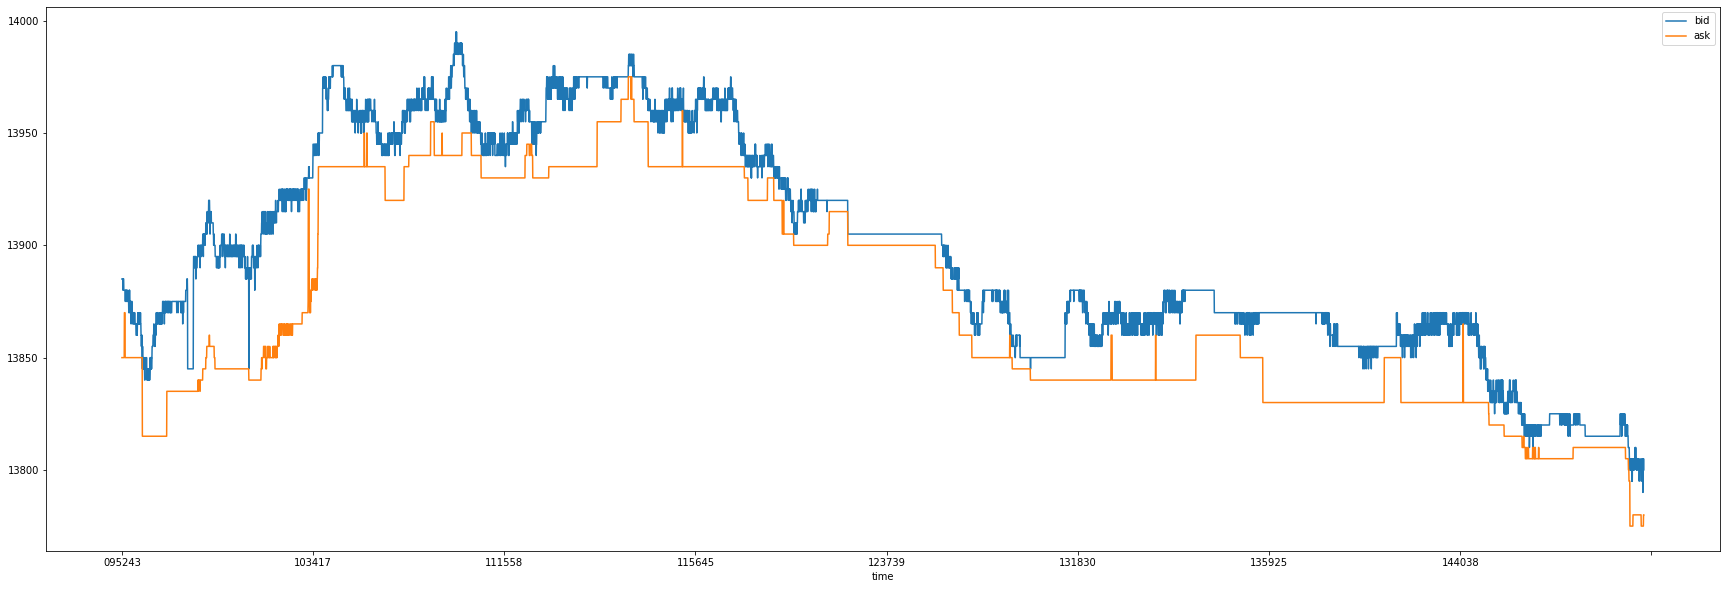

In [ ]:
kodex_active_bidask.plot()

# 시뮬레이션

In [ ]:
profit = 0
profits = {}

kodex = 100
tiger = 100

init = 100

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 3*4:
            continue
        profit = 0
        t = 0
        check = None
        kodex = 100
        tiger = 100
        for i in range(len(bidask)):
            if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and init <=tiger<= init*2-lev:
                kodex -= lev
                tiger += lev
                profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['tiger_active_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and tiger > init and check == 'short':
                profit += bidask['tiger_active_ask'].iloc[i]*(tiger - init) - bidask['kodex_active_bid'].iloc[i]*(tiger-init)
                tiger = init
                kodex = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and init<= kodex<=init*2-lev:
                kodex += lev
                tiger -= lev
                profit += bidask['tiger_active_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and kodex > init and check == 'long':
                profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
                tiger = init
                kodex = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['tiger_active_ask'].iloc[-1]*(tiger - init) - bidask['kodex_active_bid'].iloc[-1]*(tiger-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

In [ ]:
profit = 0
profits = {}

kodex = 100
tiger = 100

init = 100

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 3*4:
            continue
        profit = 0
        t = 0
        check = None
        kodex = 100
        tiger = 100
        for i in range(len(bidask)):
            if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and init <=tiger<= init*2-lev:
                kodex -= lev
                tiger += lev
                profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['tiger_active_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and tiger > init and check == 'short':
                profit += bidask['tiger_active_ask'].iloc[i]*(tiger - init) - bidask['kodex_active_bid'].iloc[i]*(tiger-init)
                tiger = init
                kodex = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and init<= kodex<=init*2-lev:
                kodex += lev
                tiger -= lev
                profit += bidask['tiger_active_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and kodex > init and check == 'long':
                profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
                tiger = init
                kodex = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['tiger_active_ask'].iloc[-1]*(tiger - init) - bidask['kodex_active_bid'].iloc[-1]*(tiger-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*3
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

In [46]:
kodex = 500
tiger = 500

init = 500

lev = 10

profit = 0
t = 0
check = None

j = 100
k = -85

for i in range(len(bidask)):
    if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and init <= tiger<=init*2-lev:
        kodex -= lev
        tiger += lev
        profit += bidask['kodex_active_ask'].iloc[i]*lev - bidask['tiger_active_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'short'
    if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and tiger > init and check == 'short':
        profit += bidask['tiger_active_ask'].iloc[i]*(tiger - init) - bidask['kodex_active_bid'].iloc[i]*(tiger-init)
        tiger = init
        kodex = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['tiger_active_ask'].iloc[i] - bidask['kodex_active_bid'].iloc[i] >= k and init<= kodex<=init*2-lev:
        kodex += lev
        tiger -= lev
        profit += bidask['tiger_active_ask'].iloc[i]*lev - bidask['kodex_active_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'long'
    if bidask['kodex_active_ask'].iloc[i] - bidask['tiger_active_bid'].iloc[i] >= j and kodex > init and check == 'long':
        profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
        tiger = init
        kodex = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)       
        t += 2
    
if check == 'short':
    profit += bidask['tiger_active_ask'].iloc[-1]*(tiger - init) - bidask['kodex_active_bid'].iloc[-1]*(tiger-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_active_ask'].iloc[i],'  bid:', bidask['kodex_active_bid'].iloc[i],'  profit:',profit) 
if check == 'long':
    profit += bidask['kodex_active_ask'].iloc[i]*(kodex - init) - bidask['tiger_active_bid'].iloc[i]*(kodex-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_active_ask'].iloc[i],'  bid:', bidask['tiger_active_bid'].iloc[i],'  profit:',profit)     
print(profit - t*3,t)
print('-------------------------------------------------------------------------------------------------------------------')

shortstart 13 번째거래 /    ask: 13870   bid: 13760   profit: 1100
shortstart 14 번째거래 /    ask: 13870   bid: 13760   profit: 2200
shortstart 15 번째거래 /    ask: 13870   bid: 13760   profit: 3300
shortstart 16 번째거래 /    ask: 13870   bid: 13760   profit: 4400
shortstart 480 번째거래 /    ask: 13855   bid: 13735   profit: 5600
shortstart 481 번째거래 /    ask: 13855   bid: 13735   profit: 6800
shortstart 482 번째거래 /    ask: 13855   bid: 13735   profit: 8000
shortstart 483 번째거래 /    ask: 13850   bid: 13735   profit: 9150
shortstart 484 번째거래 /    ask: 13850   bid: 13735   profit: 10300
shortstart 485 번째거래 /    ask: 13850   bid: 13735   profit: 11450
shortstart 486 번째거래 /    ask: 13850   bid: 13735   profit: 12600
shortstart 487 번째거래 /    ask: 13845   bid: 13735   profit: 13700
shortstart 488 번째거래 /    ask: 13845   bid: 13735   profit: 14800
shortstart 489 번째거래 /    ask: 13845   bid: 13735   profit: 15900
shortstart 490 번째거래 /    ask: 13845   bid: 13735   profit: 17000
shortstart 491 번째거래 /    ask: 13845  